In [625]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 
import sys
import os
import math

In [626]:
FlightsDB = pd.read_csv('data/DM_AIAI_FlightsDB.csv', sep = ',')
CustomerDB = pd.read_csv('data/DM_AIAI_CustomerDB.csv', sep = ',')

In [627]:
CustomerDB.head()

,Unnamed: 0,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,...,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,...,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,...,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
3,3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,...,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
4,4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,...,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion


In [628]:
FlightsDB.head()

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,413052,2021,12,12/1/2021,2.0,2.0,9384.0,938.0,0.0,0.0
1,464105,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
2,681785,2021,12,12/1/2021,10.0,3.0,14745.0,1474.0,0.0,0.0
3,185013,2021,12,12/1/2021,16.0,4.0,26311.0,2631.0,3213.0,32.0
4,216596,2021,12,12/1/2021,9.0,0.0,19275.0,1927.0,0.0,0.0


In [629]:
CustomerDB = CustomerDB.drop(columns=['Unnamed: 0'])
CustomerDB.tail()

,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
16916,100012,Ethan,Thompson,Ethan Thompson,Canada,Quebec,Quebec City,46.759733,-71.141009,Y0C 7D6,male,Bachelor,Suburban,NaN,Single,Star,2/27/2019,2/27/2019,NaN,Standard
16917,100013,Layla,Young,Layla Young,Canada,Alberta,Edmonton,53.524829,-113.546357,L3S 9Y3,female,Bachelor,Rural,NaN,Married,Star,9/20/2017,9/20/2017,NaN,Standard
16918,100014,Amelia,Bennett,Amelia Bennett,Canada,New Brunswick,Moncton,46.051866,-64.825428,G2S 2B6,male,Bachelor,Rural,NaN,Married,Star,11/28/2020,11/28/2020,NaN,Standard
16919,100015,Benjamin,Wilson,Benjamin Wilson,Canada,Quebec,Quebec City,46.862970,-71.133444,B1Z 8T3,female,College,Urban,NaN,Married,Star,4/9/2020,4/9/2020,NaN,Standard
16920,100016,Emma,Martin,Emma Martin,Canada,British Columbia,Dawson Creek,55.720562,-120.160090,M4A 1E4,female,Master,Suburban,NaN,Single,Star,7/21/2020,7/21/2020,NaN,Standard


In [630]:
FlightsDB.tail()

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
608431,999902,2019,12,12/1/2019,7.2,0.0,30766.5,3076.65,0.0,0.0
608432,999911,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
608433,999940,2019,12,12/1/2019,14.4,0.9,18261.0,1826.10,0.0,0.0
608434,999982,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0
608435,999986,2019,12,12/1/2019,0.0,0.0,0.0,0.00,0.0,0.0


In [631]:
print(CustomerDB.columns)

print(CustomerDB.shape)

Index(['Loyalty#', 'First Name', 'Last Name', 'Customer Name', 'Country',
       'Province or State', 'City', 'Latitude', 'Longitude', 'Postal code',
       'Gender', 'Education', 'Location Code', 'Income', 'Marital Status',
       'LoyaltyStatus', 'EnrollmentDateOpening', 'CancellationDate',
       'Customer Lifetime Value', 'EnrollmentType'],
      dtype='object')
(16921, 20)


In [632]:
print(FlightsDB.columns)

print(FlightsDB.shape)

Index(['Loyalty#', 'Year', 'Month', 'YearMonthDate', 'NumFlights',
       'NumFlightsWithCompanions', 'DistanceKM', 'PointsAccumulated',
       'PointsRedeemed', 'DollarCostPointsRedeemed'],
      dtype='object')
(608436, 10)


In [633]:
CustomerDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loyalty#                 16921 non-null  int64  
 1   First Name               16921 non-null  object 
 2   Last Name                16921 non-null  object 
 3   Customer Name            16921 non-null  object 
 4   Country                  16921 non-null  object 
 5   Province or State        16921 non-null  object 
 6   City                     16921 non-null  object 
 7   Latitude                 16921 non-null  float64
 8   Longitude                16921 non-null  float64
 9   Postal code              16921 non-null  object 
 10  Gender                   16921 non-null  object 
 11  Education                16921 non-null  object 
 12  Location Code            16921 non-null  object 
 13  Income                   16901 non-null  float64
 14  Marital Status        

From the dataset, we can conclude the following:
- **'Income'** and **'Customer Lifetime Value'** have exactly the same missing values, suggesting that these two variables are likely related.
- **CancellationDate** has a large number of missing values, indicating that the majority of customers are likely still active.
- **EnrollmentDateOpening** and **CancellationDate** should be convert to DateTime

In [634]:
FlightsDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608436 entries, 0 to 608435
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  608436 non-null  int64  
 1   Year                      608436 non-null  int64  
 2   Month                     608436 non-null  int64  
 3   YearMonthDate             608436 non-null  object 
 4   NumFlights                608436 non-null  float64
 5   NumFlightsWithCompanions  608436 non-null  float64
 6   DistanceKM                608436 non-null  float64
 7   PointsAccumulated         608436 non-null  float64
 8   PointsRedeemed            608436 non-null  float64
 9   DollarCostPointsRedeemed  608436 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 46.4+ MB


From the dataset, we can conclude the following:

- No missing values 

- **YearMonthDate** should be converted to datetime

- **NumFlights**, **NumFlightsWithCompanions**, **PointsAccumulated** and **PointsRedeemed** should be converted to integer

In [635]:
CustomerDB.dtypes

Loyalty#                     int64
First Name                  object
Last Name                   object
Customer Name               object
Country                     object
Province or State           object
City                        object
Latitude                   float64
Longitude                  float64
Postal code                 object
Gender                      object
Education                   object
Location Code               object
Income                     float64
Marital Status              object
LoyaltyStatus               object
EnrollmentDateOpening       object
CancellationDate            object
Customer Lifetime Value    float64
EnrollmentType              object
dtype: object

The types of the following features in CustomerDB should be:
- **'EnrollmentDateOpening'**: datetime64
- **'CancellationDate'**: datetime64

This will be addressed in the Data Types section to ensure proper handling for filtering, comparison, and time-based analysis.


In [636]:
FlightsDB.dtypes

Loyalty#                      int64
Year                          int64
Month                         int64
YearMonthDate                object
NumFlights                  float64
NumFlightsWithCompanions    float64
DistanceKM                  float64
PointsAccumulated           float64
PointsRedeemed              float64
DollarCostPointsRedeemed    float64
dtype: object

The types of the following features in FlightsDB should be:
- **'NumFlights'**: int64
- **'NumFlightswithCompanions'**: int64
- **'PointsAccumulated'**: int64
- **'PointsRedeemed'**: int64

In [637]:
CustomerDB.nunique()

Loyalty#                   16757
First Name                  4941
Last Name                  15404
Customer Name              16921
Country                        1
Province or State             11
City                          29
Latitude                      49
Longitude                     49
Postal code                   75
Gender                         2
Education                      5
Location Code                  3
Income                      5694
Marital Status                 3
LoyaltyStatus                  3
EnrollmentDateOpening       2449
CancellationDate            1260
Customer Lifetime Value     7996
EnrollmentType                 2
dtype: int64

The feature **Country** contains only a single unique value, meaning it provides no meaningful information for analysis. Therefore, it is recommended to drop this feature.

The features **EnrollmentType** and **Gender** each have only two unique categories. Since they are binary, we can transform them into boolean variables for easier analysis and modeling.

In [638]:
FlightsDB.nunique()

Loyalty#                    16737
Year                            3
Month                          12
YearMonthDate                  36
NumFlights                     41
NumFlightsWithCompanions       22
DistanceKM                  66762
PointsAccumulated           37064
PointsRedeemed               8146
DollarCostPointsRedeemed      104
dtype: int64

We have all information right, we have information for each month of the 3 years.

# Descriptive Statistics

In [639]:
CustomerDB.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loyalty#,16921.0,NaN,NaN,NaN,550197.393771,259251.503597,100011.0,326823.0,550896.0,772438.0,999999.0
First Name,16921,4941,Deon,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Name,16921,15404,Salberg,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,16921,16921,Emma Martin,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,16921,1,Canada,16921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Province or State,16921,11,Ontario,5468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,16921,29,Toronto,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,16921.0,NaN,NaN,NaN,47.1745,3.307971,42.984924,44.231171,46.087818,49.28273,60.721188
Longitude,16921.0,NaN,NaN,NaN,-91.814768,22.242429,-135.05684,-120.23766,-79.383186,-74.596184,-52.712578
Postal code,16921,75,V6E 3D9,917,NaN,NaN,NaN,NaN,NaN,NaN,NaN


All customers are located in Canada; the most common province is Ontario and the most common city is Toronto. The Province or State we could encode as one-hot for modeling.

The **"Income"** field has a mean of about 37,758, with a wide range (0 to 99,981), so it means that each customer, in average receives a income of 37k per year.

**Customer Lifetime Value** also shows significant variability, highlighting a broad spectrum of customer worth.

**Loyalty Status** has three categories, with "Star" being the most common.

Most accounts were opened with the "Standard" enrollment type. We see that we clearly don't have a fairly balanced category, so we may drop it.

There are many more enrollments than cancellations, suggesting most customers remain active.

**First Name**, **Last Name** and **Customer Name** does not seems to have significant relevance, so we will drop them.

Encode **Province**, **City**, **Education**, **LoyaltyStatus** with one-hot or ordinal encoding.


In [640]:
FlightsDB.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loyalty#,608436.0,NaN,NaN,NaN,550037.873084,258935.180575,100018.0,326961.0,550834.0,772194.0,999986.0
Year,608436.0,NaN,NaN,NaN,2020.0,0.816497,2019.0,2019.0,2020.0,2021.0,2021.0
Month,608436.0,NaN,NaN,NaN,6.5,3.452055,1.0,3.75,6.5,9.25,12.0
YearMonthDate,608436,36,12/1/2021,16901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumFlights,608436.0,NaN,NaN,NaN,3.908107,5.057889,0.0,0.0,0.0,7.2,21.0
NumFlightsWithCompanions,608436.0,NaN,NaN,NaN,0.983944,2.003785,0.0,0.0,0.0,0.9,11.0
DistanceKM,608436.0,NaN,NaN,NaN,7939.341419,10260.421873,0.0,0.0,856.4,15338.175,42040.0
PointsAccumulated,608436.0,NaN,NaN,NaN,793.777781,1025.918521,0.0,0.0,85.275,1533.7125,4204.0
PointsRedeemed,608436.0,NaN,NaN,NaN,235.251678,983.233374,0.0,0.0,0.0,0.0,7496.0
DollarCostPointsRedeemed,608436.0,NaN,NaN,NaN,2.324835,9.725168,0.0,0.0,0.0,0.0,74.0


**NumFlights**: Average 3.9 flights per record (high variance: std = 5.06). The range is 0–21, with a median (50%) of 0, suggesting many months without flights for some customers.

**NumFlightsWithCompanions**: Average just under 1 (0.98), max of 11, showing most customers rarely travel with companions.

**DistanceKM**: Mean distance is 7,939 km, but with a high standard deviation (10,260 km). The 75th percentile is 15,338 km, but most records show much lower values (median is only 856 km).

**PointsAccumulated**: Average per record is 794, with a wide spread. Many customers accumulate few or no points in a given month.

**PointsRedeemed**: The mean (235) is much lower than points earned, with a maximum of 7,496. This indicates that point earning generally outpaces redemption for most records.

**Dollar Cost Points Redeemed**: Average value is low (2.32 unit currency), but the maximum is notably high (74), which may signal outlier redemptions events.

We have a huge correlation between the DistanceKM and the PointsAccumulated, since we have the same mean but divided by 10 - explain better. The same for DollarCostPointsRedeemed and PointsRedeemed. 

For this dataset, we could drop the colum YearMonthDate, and Join the Year and Month. This is because we, before merge, have to change the dataset.

# Missing Values

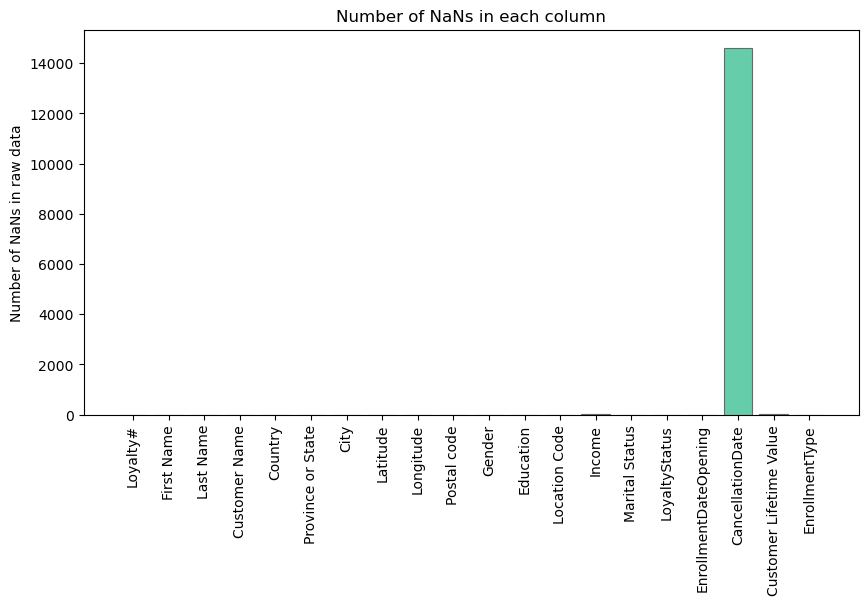

In [641]:
number_of_nans = CustomerDB.isnull().sum()
x_xis = number_of_nans.index.tolist()
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.ylabel('Number of NaNs in raw data')
plt.title('Number of NaNs in each column')
plt.bar(x=x_xis, height=number_of_nans, color='mediumaquamarine', edgecolor='dimgray', linewidth=0.8)

plt.show()

In [642]:
# Total rows
total_rows = CustomerDB.shape[0]

# Count of NaNs per column
nan_count = CustomerDB.isna().sum()

# Percentage of NaNs per column
nan_percentage = (nan_count / total_rows) * 100

# Display
nan_percentage


Loyalty#                    0.000000
First Name                  0.000000
Last Name                   0.000000
Customer Name               0.000000
Country                     0.000000
Province or State           0.000000
City                        0.000000
Latitude                    0.000000
Longitude                   0.000000
Postal code                 0.000000
Gender                      0.000000
Education                   0.000000
Location Code               0.000000
Income                      0.118196
Marital Status              0.000000
LoyaltyStatus               0.000000
EnrollmentDateOpening       0.000000
CancellationDate           86.348325
Customer Lifetime Value     0.118196
EnrollmentType              0.000000
dtype: float64

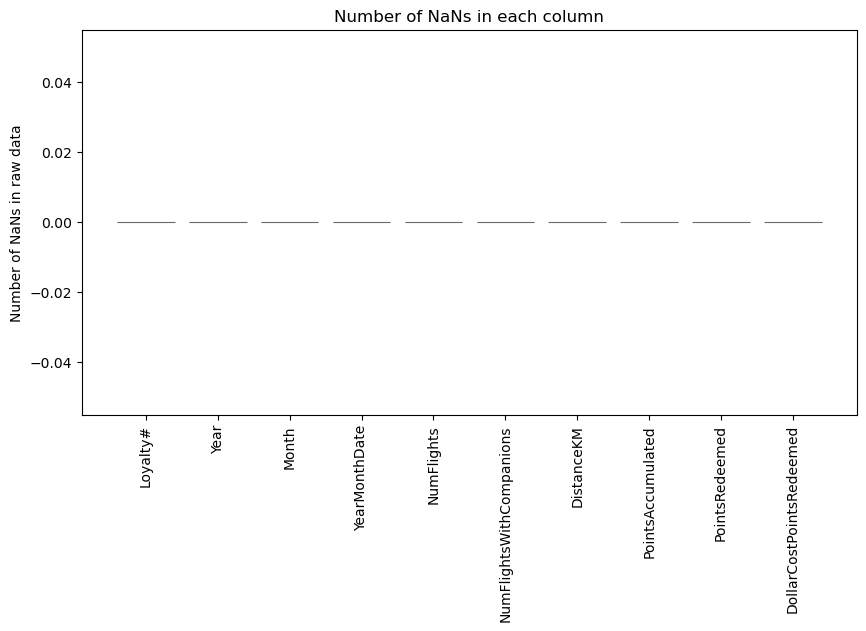

In [643]:
number_of_nans = FlightsDB.isnull().sum()
x_xis = number_of_nans.index.tolist()
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.ylabel('Number of NaNs in raw data')
plt.title('Number of NaNs in each column')
plt.bar(x=x_xis, height=number_of_nans, color='mediumaquamarine', edgecolor='dimgray', linewidth=0.8)

plt.show()

## Missing Values in CustomerDB

## Cancellation Date

To address missing values in the CancellationDate column, we will create a new binary feature named 'Is Active.' This feature will indicate whether a customer is active or cancelled. Specifically, for all rows where the CancellationDate is missing (NaN), assign 'Is Active' a value of 1, meaning the customer is active. For rows where CancellationDate is present, assign 'Is Active' a value of 0, indicating cancellation occurred.

In [644]:
#CustomerDB['CancellationDate'] = CustomerDB['CancellationDate'].fillna('Active')

## Income

In [645]:
# Filter rows where Income is missing
income_nan_df = CustomerDB[CustomerDB['Income'].isna()]

# Show how many customers have missing income
print(f"Total customers with missing Income: {income_nan_df.shape[0]}")

income_nan_df.head(20)

Total customers with missing Income: 20


,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
16901,999987,Layla,Murphy,Layla Murphy,Canada,New Brunswick,Fredericton,46.029263,-66.565150,R4H 2Y2,female,Bachelor,Urban,NaN,Single,Star,3/7/2017,3/7/2017,NaN,Standard
16902,999988,Jana,Parker,Jana Parker,Canada,Quebec,Montreal,45.573672,-73.523012,N6B 1N3,male,College,Rural,NaN,Single,Star,8/22/2017,8/22/2017,NaN,Standard
16903,999989,Ethan,Parker,Ethan Parker,Canada,Ontario,Trenton,44.075379,-77.550375,P8F 5C8,male,College,Rural,NaN,Married,Star,9/12/2015,9/12/2015,NaN,Standard
16904,999990,Ryan,Anderson,Ryan Anderson,Canada,New Brunswick,Moncton,46.106617,-64.714267,B6P 6D0,female,College,Rural,NaN,Married,Star,6/10/2019,6/10/2019,NaN,Standard
16905,999991,Olivia,Cote,Olivia Cote,Canada,New Brunswick,Fredericton,45.950000,-66.652437,X3W 5N2,female,College,Suburban,NaN,Married,Star,7/20/2019,7/20/2019,NaN,Standard
16906,999992,Ella,Roy,Ella Roy,Canada,Ontario,Toronto,43.706878,-79.437412,P6D 6N2,male,College,Suburban,NaN,Single,Star,3/27/2021,3/27/2021,NaN,Standard
16907,999993,Elijah,Cook,Elijah Cook,Canada,British Columbia,Dawson Creek,55.701475,-120.181716,W6H 0Z7,female,College,Suburban,NaN,Married,Star,1/27/2015,1/27/2015,NaN,Standard
16908,999994,Ethan,Chan,Ethan Chan,Canada,Ontario,Ottawa,45.365906,-75.723181,B2F 3E1,female,College,Rural,NaN,Married,Star,5/5/2016,5/5/2016,NaN,Standard
16909,999995,Liam,Wong,Liam Wong,Canada,Ontario,Ottawa,45.471557,-75.704868,B3A 2R0,female,College,Suburban,NaN,Married,Star,3/2/2020,3/2/2020,NaN,Standard
16910,999996,Isabella,Ross,Isabella Ross,Canada,Ontario,Toronto,43.690489,-79.436758,B4W 4M6,female,Bachelor,Suburban,NaN,Single,Star,9/14/2018,9/14/2018,NaN,Standard


All of the 20 customers with Income equals to nan have the same date for Cancellation and Enrollment, which suggers that the customer signed up and canceled on the same day.

The **Income** is missing, so the system likely never collected profile data for these customers because they did not complete or activate their account.

The same for **Customer Lifetime Value**, since the customers never activate their accounts, the CLV will be equal to missing value.

For FlightsDB, these customers may not appear, so we can just drop them.

## CLV

In [646]:
# Filter rows where CLV is missing
clv_missing_df = CustomerDB[CustomerDB['Customer Lifetime Value'].isna()]

# Count how many
total_clv_missing = clv_missing_df.shape[0]
print(f"Total customers with missing CLV: {total_clv_missing}")


Total customers with missing CLV: 20


In [647]:
customers_na = CustomerDB[(CustomerDB['Income'].isna()) & (CustomerDB['Customer Lifetime Value'].isna())]

# Passo 2: pegar lista de IDs
ids_na = customers_na['Loyalty#'].tolist()

# Passo 3: filtrar flights DB por esses IDs
flights_match = FlightsDB[FlightsDB['Loyalty#'].isin(ids_na)]

print(flights_match)

Empty DataFrame
Columns: [Loyalty#, Year, Month, YearMonthDate, NumFlights, NumFlightsWithCompanions, DistanceKM, PointsAccumulated, PointsRedeemed, DollarCostPointsRedeemed]
Index: []


This means we do not have recorded in FlightsDB, so we will remove this 20 rows.

## Duplicated values in the Primary Key
### CustomerDB
By the shape of the dataset the primary key should be Loyalty#, as such every value in this column should be unique


In [648]:
primary_key = 'Loyalty#'
unique_values = CustomerDB[primary_key].unique().shape
n_rows = CustomerDB[primary_key].shape [0]
if unique_values != n_rows:
    print('oh no! there are repetitions!')
else:
    print("all good! no repetitions!")

oh no! there are repetitions!


In [649]:
# Select all rows with duplicated Loyalty#
duplicated_loyalty = CustomerDB[CustomerDB['Loyalty#'].duplicated(keep=False)]

# Sort by Loyalty# and EnrollmentDateOpening
duplicated_loyalty_sorted = duplicated_loyalty.sort_values(by=['Loyalty#', 'EnrollmentDateOpening'])

# Display the result
duplicated_loyalty_sorted

,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
1646,101902,Hans,Schlottmann,Hans Schlottmann,Canada,Ontario,London,42.984924,-81.245277,M5B 3E4,female,College,Rural,0.0,Married,Aurora,1/7/2020,NaN,6265.34,Standard
2668,101902,Yi,Nesti,Yi Nesti,Canada,Ontario,Toronto,43.653225,-79.383186,M8Y 4K8,female,Bachelor,Urban,79090.0,Married,Aurora,3/19/2020,NaN,8609.16,Standard
700,106001,Ivette,Peifer,Ivette Peifer,Canada,Quebec,Montreal,45.501690,-73.567253,H2Y 4R4,female,High School or Below,Suburban,10037.0,Single,Star,1/11/2016,NaN,4914.04,Standard
15988,106001,Maudie,Hyland,Maudie Hyland,Canada,New Brunswick,Fredericton,45.963589,-66.643112,E3B 2H2,female,Master,Suburban,14973.0,Divorced,Star,7/16/2015,NaN,12168.74,Standard
9413,106509,Ardelia,Whitehorse,Ardelia Whitehorse,Canada,Ontario,Toronto,43.653225,-79.383186,M8Y 4K8,male,Bachelor,Rural,30915.0,Married,Nova,4/25/2020,10/7/2021,16727.77,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,989528,Sharri,Boughman,Sharri Boughman,Canada,Quebec,Montreal,45.501690,-73.567253,H2T 2J6,female,College,Rural,0.0,Divorced,Nova,5/1/2020,NaN,3370.07,Standard
9890,990512,Magda,Sopher,Magda Sopher,Canada,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,0.0,Single,Star,10/21/2018,NaN,1904.00,Standard
14478,990512,Ione,Snowden,Ione Snowden,Canada,British Columbia,Vancouver,49.282730,-123.120740,V5R 1W3,female,College,Urban,0.0,Single,Star,8/20/2021,NaN,6870.61,Standard
16380,992168,Crysta,Bennin,Crysta Bennin,Canada,Ontario,Ottawa,45.421532,-75.697189,K1F 2R2,female,Master,Urban,22828.0,Married,Star,12/18/2017,NaN,16473.17,Standard


In [650]:
# Find duplicated combinations
duplicates = CustomerDB.groupby(['Loyalty#', 'EnrollmentDateOpening']).size().reset_index(name='count')
duplicates = duplicates[duplicates['count'] > 1]

print("Duplicated combinations:")
print(duplicates)

Duplicated combinations:
Empty DataFrame
Columns: [Loyalty#, EnrollmentDateOpening, count]
Index: []


In [651]:
# Count occurrences of each Loyalty#
loyalty_counts = CustomerDB['Loyalty#'].value_counts()

# Filter Loyalty# that appear more than 3 times
loyalty_repeated = loyalty_counts[loyalty_counts > 3]

print("Loyalty# appearing more than 3 times:")
print(loyalty_repeated)

Loyalty# appearing more than 3 times:
Series([], Name: count, dtype: int64)


Currently, we do not have any fully duplicated rows in the dataset, so there is no need to remove anything at this stage.

Although some Loyalty# IDs appear more than once, the rows themselves are different. These cases will be handled later, because even though the ID is the same, the customer names are different. 

We do not have more than 3 different customers for the same ID.

We should delete this duplicated rows since we think it is an error from the dataset. How to do it? We can do it keeping the first row. 

## Data Types
### CustomerDB
We should change the data types of the following features to datetime:

- **EnrollmentDateOpening**

- **CancellationDate**


Discuss if we change now or after

In [652]:
CustomerDB['EnrollmentDateOpening']= pd.to_datetime(CustomerDB['EnrollmentDateOpening'], errors='coerce')
CustomerDB['CancellationDate']= pd.to_datetime(CustomerDB['CancellationDate'], errors='coerce')
                                               

## FlightsDB

We should change the data types of the following features:
- **NumFlights**: to int
- **NumFlightsWithCompanions**: to int
- **PointsAccumulated**: to int 
- **PointsRedeemed**: to int

In [653]:
# List of columns to convert
int_columns = ['NumFlights', 'NumFlightsWithCompanions', 'PointsAccumulated', 'PointsRedeemed']

# Convert each column to integer, using 'Int64' for nullable integers
for col in int_columns:
    FlightsDB[col] = pd.to_numeric(FlightsDB[col], errors='coerce').astype('int64')

# Convert both columns to datetime
FlightsDB['YearMonthDate'] = pd.to_datetime(
    FlightsDB['YearMonthDate'], errors='coerce'
)


# Univariate Analysis

## Categorical Features

## CustomerDB

In [654]:
non_numerical_columns = CustomerDB.select_dtypes(include=['object']).columns.tolist()

In [655]:
for col in non_numerical_columns:
    print(f'{col}: {CustomerDB[col].unique()}')

First Name: ['Cecilia' 'Dayle' 'Necole' ... 'Juliann' 'Olivia' 'Liam']
Last Name: ['Householder' 'Menez' 'Hannon' ... 'Bennett' 'Wilson' 'Martin']
Customer Name: ['Cecilia Householder' 'Dayle Menez' 'Necole Hannon' ... 'Amelia Bennett'
 'Benjamin Wilson' 'Emma Martin']
Country: ['Canada']
Province or State: ['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
City: ['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Moncton' 'Fredericton' 'Ottawa' 'Tremblant'
 'Calgary' 'Whistler' 'Thunder Bay' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Victoria' 'Regina' 'Kelowna'
 "St. John's" 'Kingston' 'Banff' 'Charlottetown']
Postal code: ['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'Y2K 6R0' 'P5S 6R4'
 'K8V 4B2' 'H2Y 2W2' 'M8Y 4K8' 'U5I 4F1' 'G1B 3L5' 'H4G 3T4' 'M2M 7K8'
 'M2M 6J7' 'E1A 2A7' 'E3B 2H2' 'M1R 4K

## Gender

In [656]:
CustomerDB['Gender'] = CustomerDB['Gender'].str.capitalize()

## Postal Code

In [657]:
# Canadian postal code format: A1A 1A1
pattern = r'^[A-Z]\d[A-Z] \d[A-Z]\d$'

# Check format validity
CustomerDB['ValidPostalCode'] = CustomerDB['Postal code'].str.match(pattern)

# Filter invalid postal codes
invalid_postal = CustomerDB[~CustomerDB['ValidPostalCode']]

# Show unique invalid postal codes with province/state and loyalty ID
unique_invalid = invalid_postal[['Postal code', 'Province or State']].drop_duplicates()

print(unique_invalid)



    Postal code Province or State
73      V10 6T5  British Columbia
110     V09 2E9  British Columbia


we have Postal Code wrongs, so this means we have to change it.

In [658]:
# Remove the Postal code column
CustomerDB = CustomerDB.drop(columns=['ValidPostalCode'])

# Verificar se foi removida
print(CustomerDB.columns)

Index(['Loyalty#', 'First Name', 'Last Name', 'Customer Name', 'Country',
       'Province or State', 'City', 'Latitude', 'Longitude', 'Postal code',
       'Gender', 'Education', 'Location Code', 'Income', 'Marital Status',
       'LoyaltyStatus', 'EnrollmentDateOpening', 'CancellationDate',
       'Customer Lifetime Value', 'EnrollmentType'],
      dtype='object')


## First Name, Last Name and Customer Name

In [659]:
# Clean spaces
CustomerDB['First Name'] = CustomerDB['First Name'].str.strip()
CustomerDB['Last Name'] = CustomerDB['Last Name'].str.strip()
CustomerDB['Customer Name'] = CustomerDB['Customer Name'].str.strip()

# Updated pattern (allows accents, hyphens, apostrophes, spaces)
pattern = r'^[A-Z][A-Za-zÀ-ÿ\' -]*$'

invalid_names = CustomerDB[
    ~CustomerDB['First Name'].fillna('').str.match(pattern) |
    ~CustomerDB['Last Name'].fillna('').str.match(pattern) |
    ~CustomerDB['Customer Name'].fillna('').str.match(pattern)
]

print(invalid_names[['Loyalty#', 'First Name', 'Last Name', 'Customer Name']].drop_duplicates())


Empty DataFrame
Columns: [Loyalty#, First Name, Last Name, Customer Name]
Index: []


#### Histograms

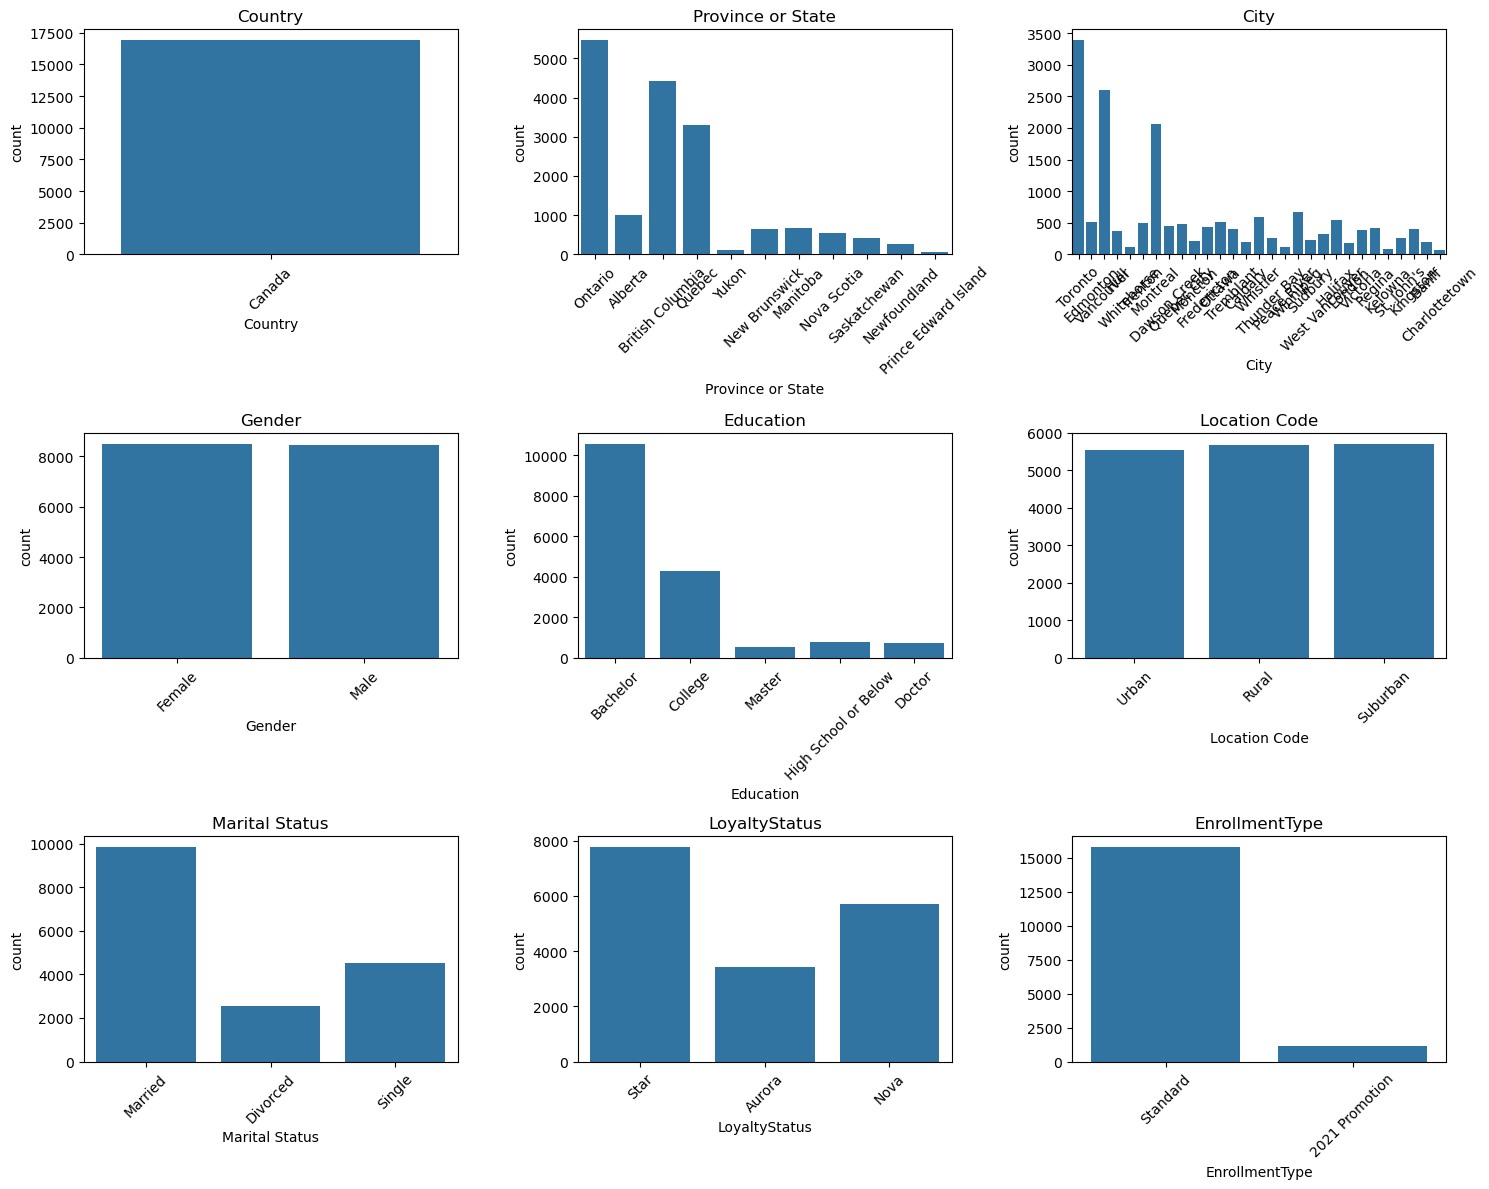

In [660]:
exclude_cols = ['First Name', 'Customer Name', 'Postal code', 'Last Name', 'Loyalty#']

categorical_cols_filtered = [col for col in non_numerical_columns if col not in exclude_cols]

# Number of columns per row
cols_per_row = 3

# Calculate number of rows needed
num_rows = math.ceil(len(categorical_cols_filtered) / cols_per_row)

# Set up the figure
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(5*cols_per_row, 4*num_rows))
axes = axes.flatten()  # flatten in case we have less plots than grid

for i, col in enumerate(categorical_cols_filtered):
    sns.countplot(data=CustomerDB, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

# Turn off any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

- **Gender**: similar proportion for both men and women, indicating that it holds significance for cluster analysis
- **Location Code**: also demonstrastes a good distribution, making it useful for clustering.
- **EnrollmentType**, **Education** and **Marital Status** exhibit substantial proportional differences, which suggests they may not serve as strong indicators for defininf clusters

### Pie Chart

## Province or State and City

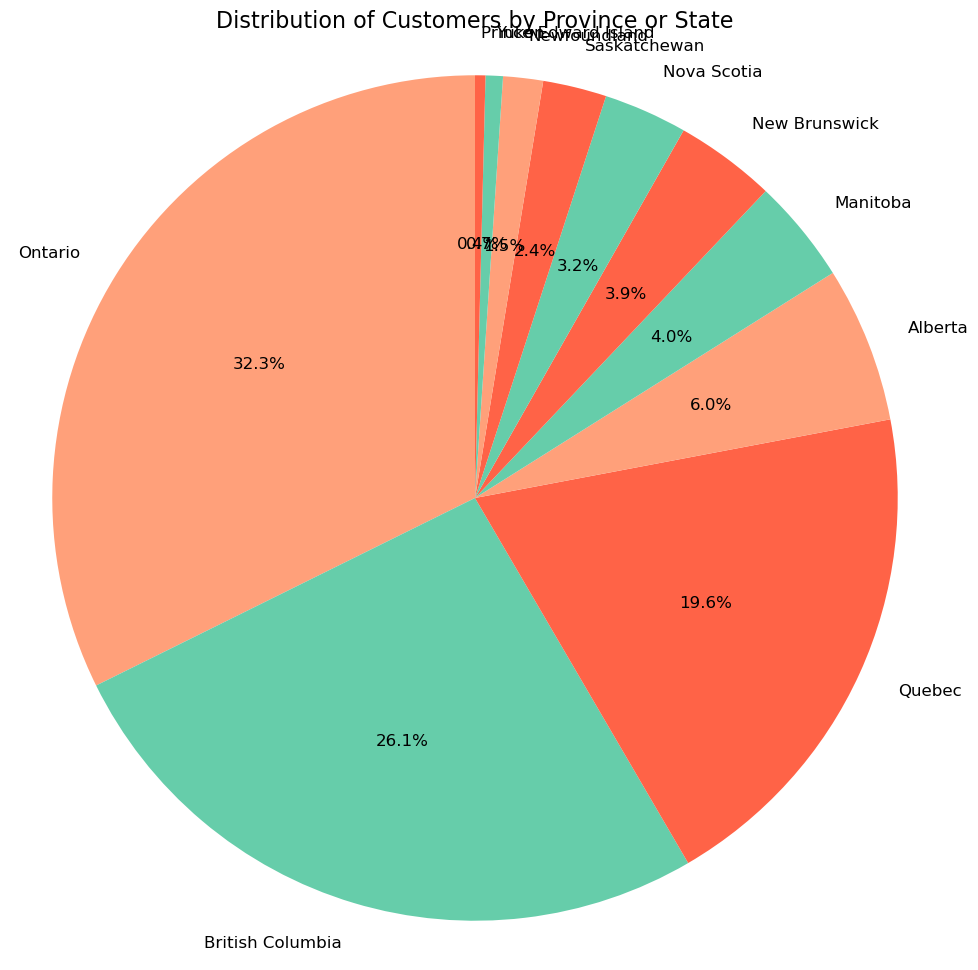

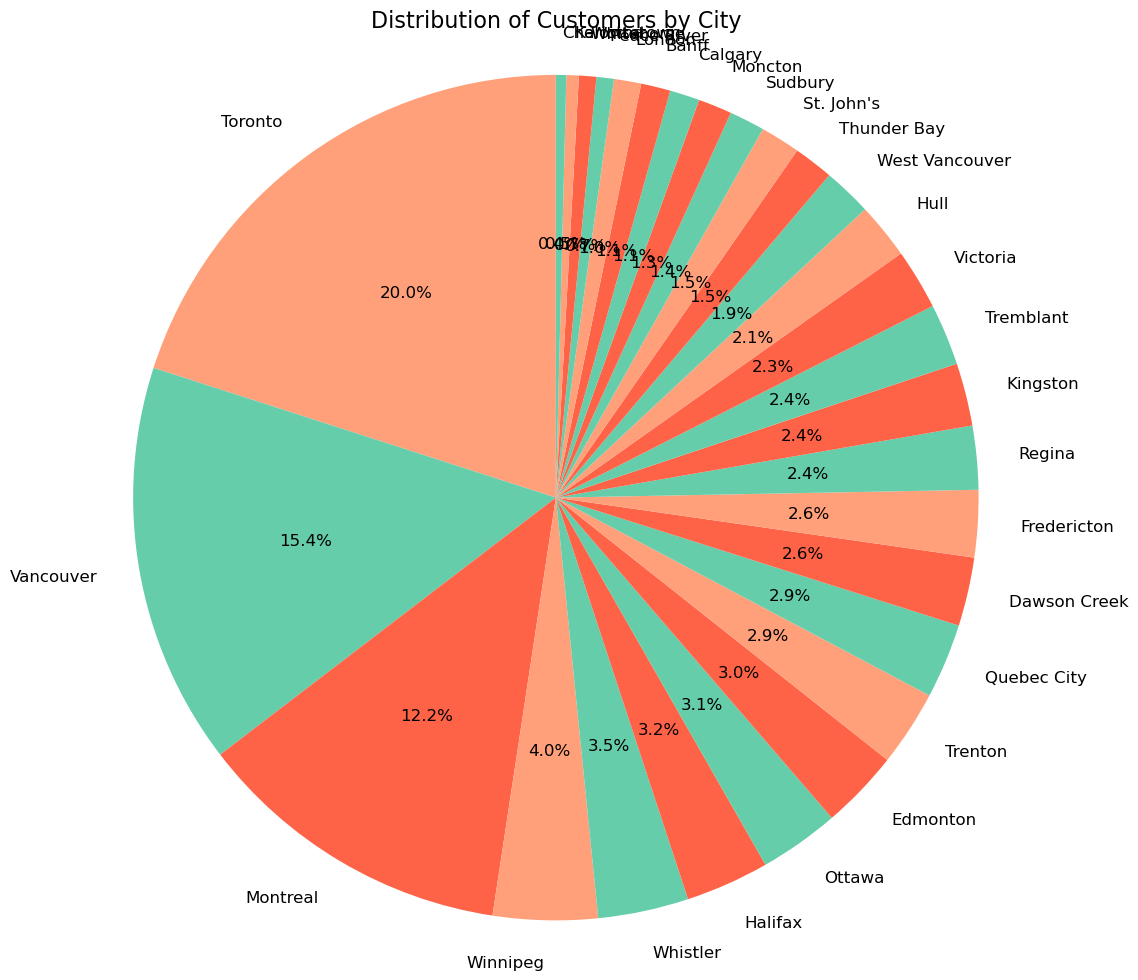

In [661]:
columns_to_plot = ['Province or State', 'City']

colors = ['lightsalmon', 'mediumaquamarine', 'tomato','lightsalmon', 
          'mediumaquamarine','tomato', 'mediumaquamarine', 'tomato']

for col in columns_to_plot:
    counts = CustomerDB[col].value_counts()
    
    plt.figure(figsize=(12, 12))
    plt.pie(
        counts, 
        labels=counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=colors[:len(counts)],  # Use only as many colors as needed
        textprops={'fontsize': 12}
    )
    plt.title(f'Distribution of Customers by {col}', fontsize=16)
    plt.axis('equal')
    plt.show()
    

## Enrollment Type

In [662]:
enrollment_prop = CustomerDB['EnrollmentType'].value_counts(normalize=True).round(4) * 100

print(enrollment_prop.reset_index().rename(columns={'index': 'EnrollmentType', 'EnrollmentType': 'Percentage (%)'}))

   Percentage (%)  proportion
0        Standard       93.22
1  2021 Promotion        6.78


This imbalance on **EnrollmentType** can reduce the variable’s effectiveness in distinguishing clusters because most data points have the same value. We will drop this feature since does not give us relevant information.

## Numerical Features

In [663]:
numerical_columns = CustomerDB.select_dtypes(include=['number']).columns.tolist() 
for col in numerical_columns:
    print(f'{col}: {CustomerDB[col].unique()}')

Loyalty#: [480934 549612 429460 ... 100014 100015 100016]
Latitude: [43.653225 53.544388 49.28273  45.42873  60.721188 44.101128 45.50169
 55.759628 46.813877 46.087818 45.963589 45.421532 46.118462 51.048615
 50.116322 48.380894 56.23418  49.895138 46.522099 49.328625 44.648766
 42.984924 48.428421 50.44521  49.887951 47.561508 44.231171 51.178398
 46.238239 46.029263 45.573672 44.075379 46.106617 45.95     43.706878
 55.701475 45.365906 45.471557 43.690489 46.067243 46.749897 53.549353
 55.751178 43.593187 46.759733 53.524829 46.051866 46.86297  55.720562]
Longitude: [ -79.383186 -113.49093  -123.12074   -75.713364 -135.05684   -77.576309
  -73.567253 -120.23766   -71.207977  -64.778229  -66.643112  -75.697189
  -74.596184 -114.07085  -122.95736   -89.247681 -117.28938   -97.138374
  -80.953033 -123.16019   -63.575237  -81.245277 -123.36565  -104.6189
 -119.49601   -52.712578  -76.485954 -115.5708    -63.131069  -66.56515
  -73.523012  -77.550375  -64.714267  -66.652437  -79.437412 -

In [664]:
# Define expected ranges for each column
rules = {
    'Loyalty#': lambda x: x >= 0,
    'Latitude': lambda x: (x >= -90) & (x <= 90),
    'Longitude': lambda x: (x >= -180) & (x <= 180),
    'Income': lambda x: x >= 0,
    'Customer Lifetime Value': lambda x: x >= 0
}

# Check each column
for col in numerical_columns:
    invalid_rows = CustomerDB[~rules[col](CustomerDB[col])]
    print(f"--- {col} ---")
    if invalid_rows.empty:
        print("All values are consistent ✅\n")
    else:
        print(f"Inconsistent values found ({len(invalid_rows)} rows):")
        print(invalid_rows[[col]])
        print("\n")


--- Loyalty# ---
All values are consistent ✅

--- Latitude ---
All values are consistent ✅

--- Longitude ---
All values are consistent ✅

--- Income ---
Inconsistent values found (20 rows):
       Income
16901     NaN
16902     NaN
16903     NaN
16904     NaN
16905     NaN
16906     NaN
16907     NaN
16908     NaN
16909     NaN
16910     NaN
16911     NaN
16912     NaN
16913     NaN
16914     NaN
16915     NaN
16916     NaN
16917     NaN
16918     NaN
16919     NaN
16920     NaN


--- Customer Lifetime Value ---
Inconsistent values found (20 rows):
       Customer Lifetime Value
16901                      NaN
16902                      NaN
16903                      NaN
16904                      NaN
16905                      NaN
16906                      NaN
16907                      NaN
16908                      NaN
16909                      NaN
16910                      NaN
16911                      NaN
16912                      NaN
16913                      NaN
16914     

### HIstograms

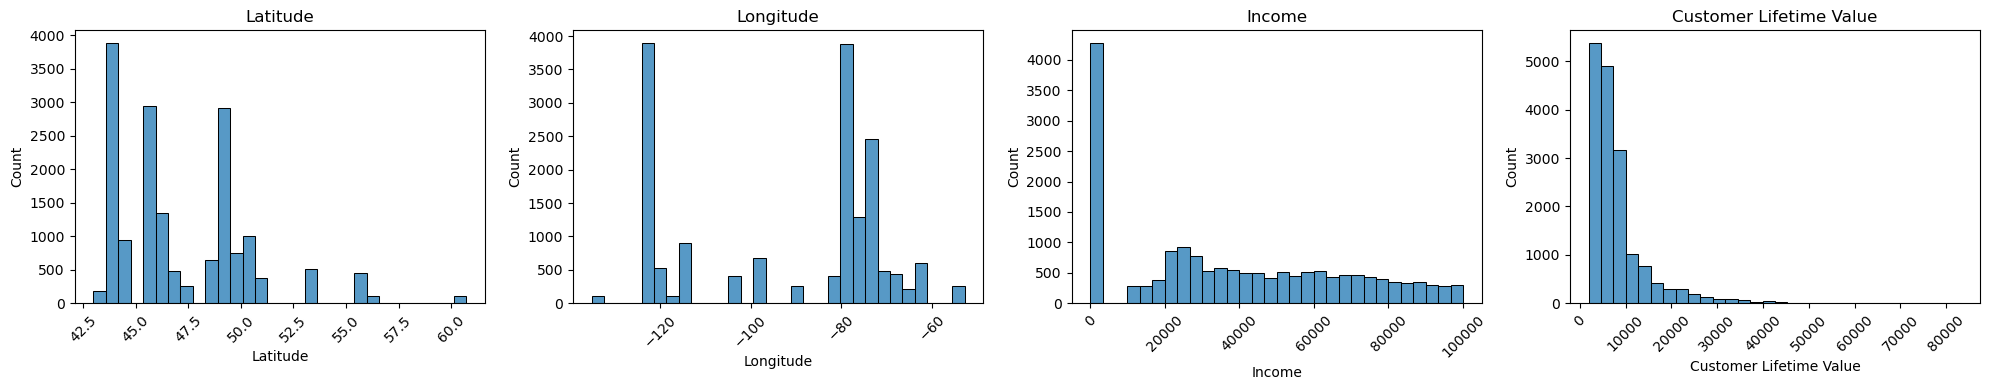

In [665]:
exclude_numeric_cols = ['Loyalty#']

numeric_cols_filtered = [col for col in numerical_columns if col not in exclude_numeric_cols]

cols_per_row = 4

num_rows = math.ceil(len(numeric_cols_filtered) / cols_per_row)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(5*cols_per_row, 4*num_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols_filtered):
    sns.histplot(CustomerDB[col], kde=False, ax=axes[i], bins=30)
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


- **Latitude**: Distribution is multi-modal, with several peaks. Most customers are concentrated between 42.50 degrees and a small number of customers exist at extreme latitudes, which could be outliers.
- **Income**: Highly skewed to the left (most values near 0). Many customers have very low income, with a long tail extendind up to 100.000.
- **CLV**: Left-skewed as well, with most of customers have low CLV. A long tail indicates a few high-value customers.

## Boxplots

#### Outliers

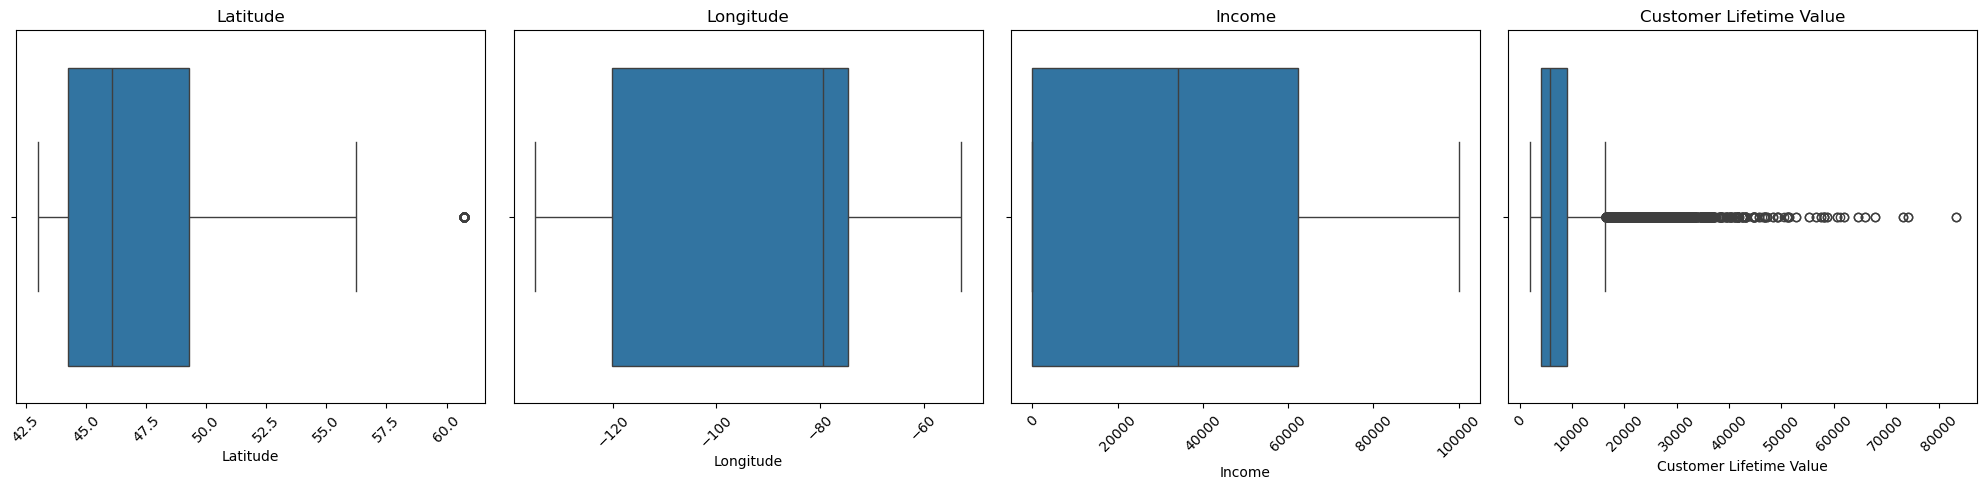

In [666]:
cols_per_row = 4

num_rows = math.ceil(len(numeric_cols_filtered) / cols_per_row)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(5*cols_per_row, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols_filtered):
    sns.boxplot(data=CustomerDB, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


**Latitude** – There is a single noticeable outlier at around 60°, which might represent a customer located much farther north than most (possibly from Alaska or Northern Canada if this is U.S.-based data).

**Longitude** – No major outliers are visible; values are mostly within a normal U.S. range (around -130° to -60°).

**Income** – The distribution looks relatively symmetric, and there are no strong outliers. Most incomes fall below 100,000.

**Customer Lifetime Value (CLV)** – This variable has a significant number of outliers on the higher end. Many points are scattered far beyond the upper whisker, indicating customers with exceptionally high lifetime values compared to the rest.
These may represent high-value or loyal customers, or possibly data entry errors (e.g., misplaced decimal points).

## Latitude

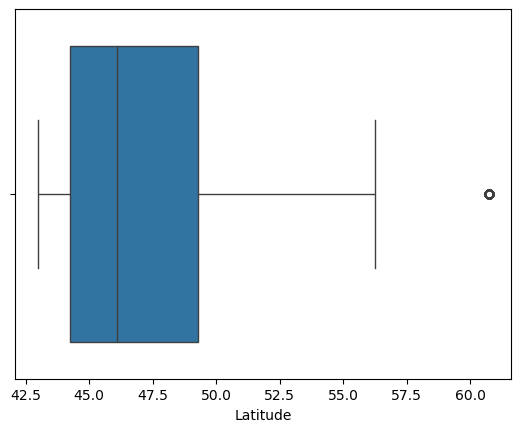

In [667]:
sns.boxplot(x=CustomerDB['Latitude'])
plt.show()

In [668]:
Q1 = CustomerDB['Latitude'].quantile(0.25)
Q3 = CustomerDB['Latitude'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_latitude = CustomerDB[(CustomerDB['Latitude'] < lower_bound) | (CustomerDB['Latitude'] > upper_bound)]

print("Outlier boundaries:")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

print("\nOutlier rows:")
print(outliers_latitude[['Latitude']])

count = outliers_latitude.shape[0]
print(f"\nTotal number of outliers in Latitude: {count}")


Outlier boundaries:
Lower bound: 36.65383250000001
Upper bound: 56.8600685

Outlier rows:
        Latitude
5      60.721188
394    60.721188
397    60.721188
499    60.721188
648    60.721188
...          ...
16021  60.721188
16029  60.721188
16161  60.721188
16215  60.721188
16507  60.721188

[112 rows x 1 columns]

Total number of outliers in Latitude: 112


In [669]:
outliers_latitude.head(10).sort_values(by='Loyalty#')

,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
648,121935,Lesia,Droesch,Lesia Droesch,Canada,Yukon,Whitehorse,60.721188,-135.05684,Y2K 6R0,Female,Doctor,Suburban,29950.0,Married,Star,2018-10-19,NaT,4878.83,2021 Promotion
5,193662,Leatrice,Hanlin,Leatrice Hanlin,Canada,Yukon,Whitehorse,60.721188,-135.05684,Y2K 6R0,Male,Bachelor,Rural,26262.0,Married,Star,2015-05-07,NaT,3844.57,Standard
394,211043,Ngoc,Naughton,Ngoc Naughton,Canada,Yukon,Whitehorse,60.721188,-135.05684,Y2K 6R0,Female,College,Urban,0.0,Single,Star,2015-07-09,NaT,4566.12,Standard
499,304944,Seymour,Sheerin,Seymour Sheerin,Canada,Yukon,Whitehorse,60.721188,-135.05684,Y2K 6R0,Female,College,Rural,0.0,Single,Star,2017-01-04,NaT,4703.72,Standard
809,399575,Amy,Bradigan,Amy Bradigan,Canada,Yukon,Whitehorse,60.721188,-135.05684,Y2K 6R0,Male,Bachelor,Rural,68331.0,Married,Aurora,2019-03-23,NaT,5033.39,Standard
944,508115,Agatha,Gilden,Agatha Gilden,Canada,Yukon,Whitehorse,60.721188,-135.05684,Y2K 6R0,Male,Bachelor,Rural,97131.0,Married,Aurora,2020-03-04,NaT,5181.62,Standard
397,517758,Golden,Maag,Golden Maag,Canada,Yukon,Whitehorse,60.721188,-135.05684,Y2K 6R0,Male,Doctor,Urban,27538.0,Divorced,Star,2015-12-07,NaT,4570.67,Standard
935,526064,Meredith,Adriance,Meredith Adriance,Canada,Yukon,Whitehorse,60.721188,-135.05684,Y2K 6R0,Male,Bachelor,Suburban,88081.0,Married,Aurora,2021-05-22,NaT,5174.08,Standard
1311,601131,Olga,Tamblyn,Olga Tamblyn,Canada,Yukon,Whitehorse,60.721188,-135.05684,Y2K 6R0,Female,Doctor,Suburban,19724.0,Married,Aurora,2019-02-11,NaT,5584.96,Standard
1247,621750,Norris,Louro,Norris Louro,Canada,Yukon,Whitehorse,60.721188,-135.05684,Y2K 6R0,Female,Bachelor,Rural,75963.0,Divorced,Aurora,2017-07-31,NaT,5515.25,Standard


The latitude outliers identified in the dataset correspond to customers located in Whitehorse, Yukon (Latitude ≈ 60.72°). While they appear as statistical outliers due to their northern position relative to most customers, they are valid and meaningful records that reflect real business presence in northern regions.

Therefore, we have decided to retain these entries in the dataset. 

## Customer Lifetime Value

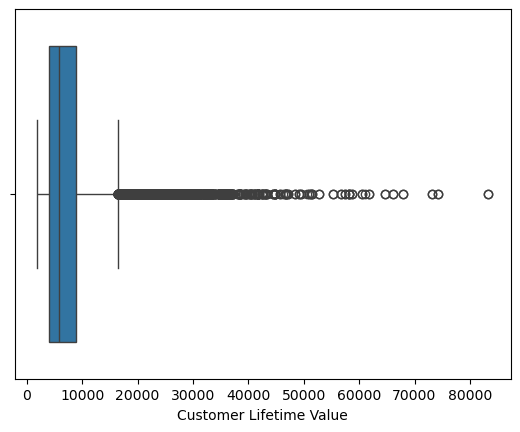

In [670]:
sns.boxplot(x=CustomerDB['Customer Lifetime Value'])
plt.show()

In [671]:
Q1 = CustomerDB['Customer Lifetime Value'].quantile(0.25)
Q3 = CustomerDB['Customer Lifetime Value'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_CLV = CustomerDB[(CustomerDB['Customer Lifetime Value'] < lower_bound) | (CustomerDB['Customer Lifetime Value'] > upper_bound)].sort_values(by='Customer Lifetime Value', ascending=False)

print("Outlier boundaries:")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

print("\nOutlier rows:")
print(outliers_CLV[['Customer Lifetime Value']])

count = outliers_CLV.shape[0]
print(f"\nTotal number of outliers in CLV: {count}")


Outlier boundaries:
Lower bound: -3469.235000000002
Upper bound: 16394.645000000004

Outlier rows:
       Customer Lifetime Value
16900                 83325.38
16899                 83325.38
16898                 74228.52
9884                  74228.52
4162                  73225.96
...                        ...
3686                  16464.37
9391                  16460.08
16373                 16414.04
9390                  16407.66
3685                  16407.66

[1501 rows x 1 columns]

Total number of outliers in CLV: 1501


In [672]:
outliers_CLV.head(10)

,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
16900,652627,Ariane,Peyton,Ariane Peyton,Canada,Manitoba,Winnipeg,49.895138,-97.138374,R2C 0M5,Female,Bachelor,Suburban,58958.0,Married,Star,2018-12-03,2019-08-03,83325.38,Standard
16899,615459,Dannie,Paplow,Dannie Paplow,Canada,Quebec,Montreal,45.501690,-73.567253,H2Y 4R4,Male,Bachelor,Urban,58958.0,Married,Star,2021-04-22,2021-12-22,83325.38,2021 Promotion
16898,776187,Janina,Lumb,Janina Lumb,Canada,British Columbia,Vancouver,49.282730,-123.120740,V5R 1W3,Male,College,Urban,0.0,Single,Star,2017-03-24,NaT,74228.52,Standard
9884,844145,Tabitha,Simonds,Tabitha Simonds,Canada,Ontario,Toronto,43.653225,-79.383186,P1J 8T7,Female,College,Urban,0.0,Single,Nova,2018-09-09,2019-04-07,74228.52,Standard
4162,767366,Alana,Sullinger,Alana Sullinger,Canada,Quebec,Montreal,45.501690,-73.567253,H4G 3T4,Female,Bachelor,Rural,39547.0,Married,Aurora,2020-03-21,2020-11-21,73225.96,Standard
4161,592003,Cletus,Chafe,Cletus Chafe,Canada,New Brunswick,Fredericton,45.963589,-66.643112,E3B 2H2,Male,Bachelor,Urban,39547.0,Married,Aurora,2021-03-11,NaT,73225.96,2021 Promotion
16897,680886,Jamee,Ahlm,Jamee Ahlm,Canada,Saskatchewan,Regina,50.445210,-104.618900,S1J 3C5,Female,Bachelor,Rural,78310.0,Married,Star,2017-09-06,NaT,67907.27,Standard
4160,838263,Delaine,Sitaca,Delaine Sitaca,Canada,Nova Scotia,Halifax,44.648766,-63.575237,B3J 9S2,Male,Bachelor,Rural,78310.0,Married,Aurora,2015-07-25,NaT,67907.27,Standard
9883,495253,Petra,Rieu,Petra Rieu,Canada,British Columbia,Whistler,50.116322,-122.957360,V6T 1Y8,Male,Bachelor,Rural,33481.0,Single,Nova,2018-04-08,NaT,66025.75,Standard
4159,179870,Inge,Brunn,Inge Brunn,Canada,Quebec,Montreal,45.501690,-73.567253,H2Y 2W2,Female,Bachelor,Rural,33481.0,Single,Aurora,2020-07-02,NaT,66025.75,Standard


We will take a more deep look beyond of this outliers, since by this heading we cannot yet conclude anything.

For this problem we can do one of three things:
- log transformation
- standard scaling
- min max scaling

## FlightsDB

### Numerical Features

In [673]:
numerical_columns_Flights = FlightsDB.select_dtypes(include=['number']).columns.tolist()

# Remove 'Loyalty#' from the list if it exists
numerical_columns_Flights = [col for col in numerical_columns_Flights if col != 'Loyalty#']

# Print unique values for each numeric column
for col in numerical_columns_Flights:
    print(f'{col}: {FlightsDB[col].unique()}')


Year: [2021 2020 2019]
Month: [12  6  5  4  3  2  1 11 10  9  8  7]
NumFlights: [ 2  0 10 16  9 12 17  6 11  7  3 13 14  8  5  4  1 15 18 20 19 21]
NumFlightsWithCompanions: [ 2  0  3  4  7  9  5  6  1  8 10 11]
DistanceKM: [ 9384.      0.  14745.  ... 11732.4 31998.6 26789.4]
PointsAccumulated: [ 938    0 1474 ... 4107   23   21]
PointsRedeemed: [   0 3213 4638 ... 5691 4598 5527]
DollarCostPointsRedeemed: [ 0.  32.  46.  40.  51.  62.  48.  50.  59.  43.  37.  41.  53.  56.
 31.  30.  63.  33.  44.  58.  60.  57.  36.  29.  42.  54.  45.  35.
 67.  39.  65.  34.  61.  66.  38.  47.  55.  68.  69.  64.  52.  49.
 71.  72.  27.  28.  70.  25.  26.  24.  23.  21.  22.  74.  73.  32.4
 36.9 27.9 21.6 26.1 31.5 33.3 22.5 40.5 28.8 37.8 24.3 20.7 29.7 30.6
 35.1 25.2 23.4 34.2 41.4 39.6 19.8 38.7 18.9 51.3 42.3 52.2 50.4 45.9
 47.7 48.6 43.2 46.8 44.1 49.5 53.1 57.6 60.3 62.1 54.9 58.5 55.8 56.7
 63.9 61.2 64.8 59.4 65.7 66.6]


## Month

In [674]:
# Check months are between 1 and 12
invalid_months = FlightsDB[(FlightsDB['Month'] < 1) | (FlightsDB['Month'] > 12)]
print("Invalid months (should be 1-12):")
print(invalid_months[['YearMonthDate', 'Month']])


Invalid months (should be 1-12):
Empty DataFrame
Columns: [YearMonthDate, Month]
Index: []


In [675]:
# Check numeric columns are >= 0
numeric_cols = ['NumFlights', 'NumFlightsWithCompanions', 'DistanceKM',
                'PointsAccumulated', 'PointsRedeemed', 'DollarCostPointsRedeemed']

invalid_numeric = FlightsDB[(FlightsDB[numeric_cols] < 0).any(axis=1)]

print("\nRows with negative numeric values:")
print(invalid_numeric[['YearMonthDate'] + numeric_cols])

# Summary
if invalid_months.empty and invalid_numeric.empty:
    print("\nAll months and numeric values are valid.")
else:
    print(f"\nFound {len(invalid_months)} invalid months and {len(invalid_numeric)} rows with negative numeric values.")


Rows with negative numeric values:
Empty DataFrame
Columns: [YearMonthDate, NumFlights, NumFlightsWithCompanions, DistanceKM, PointsAccumulated, PointsRedeemed, DollarCostPointsRedeemed]
Index: []

All months and numeric values are valid.


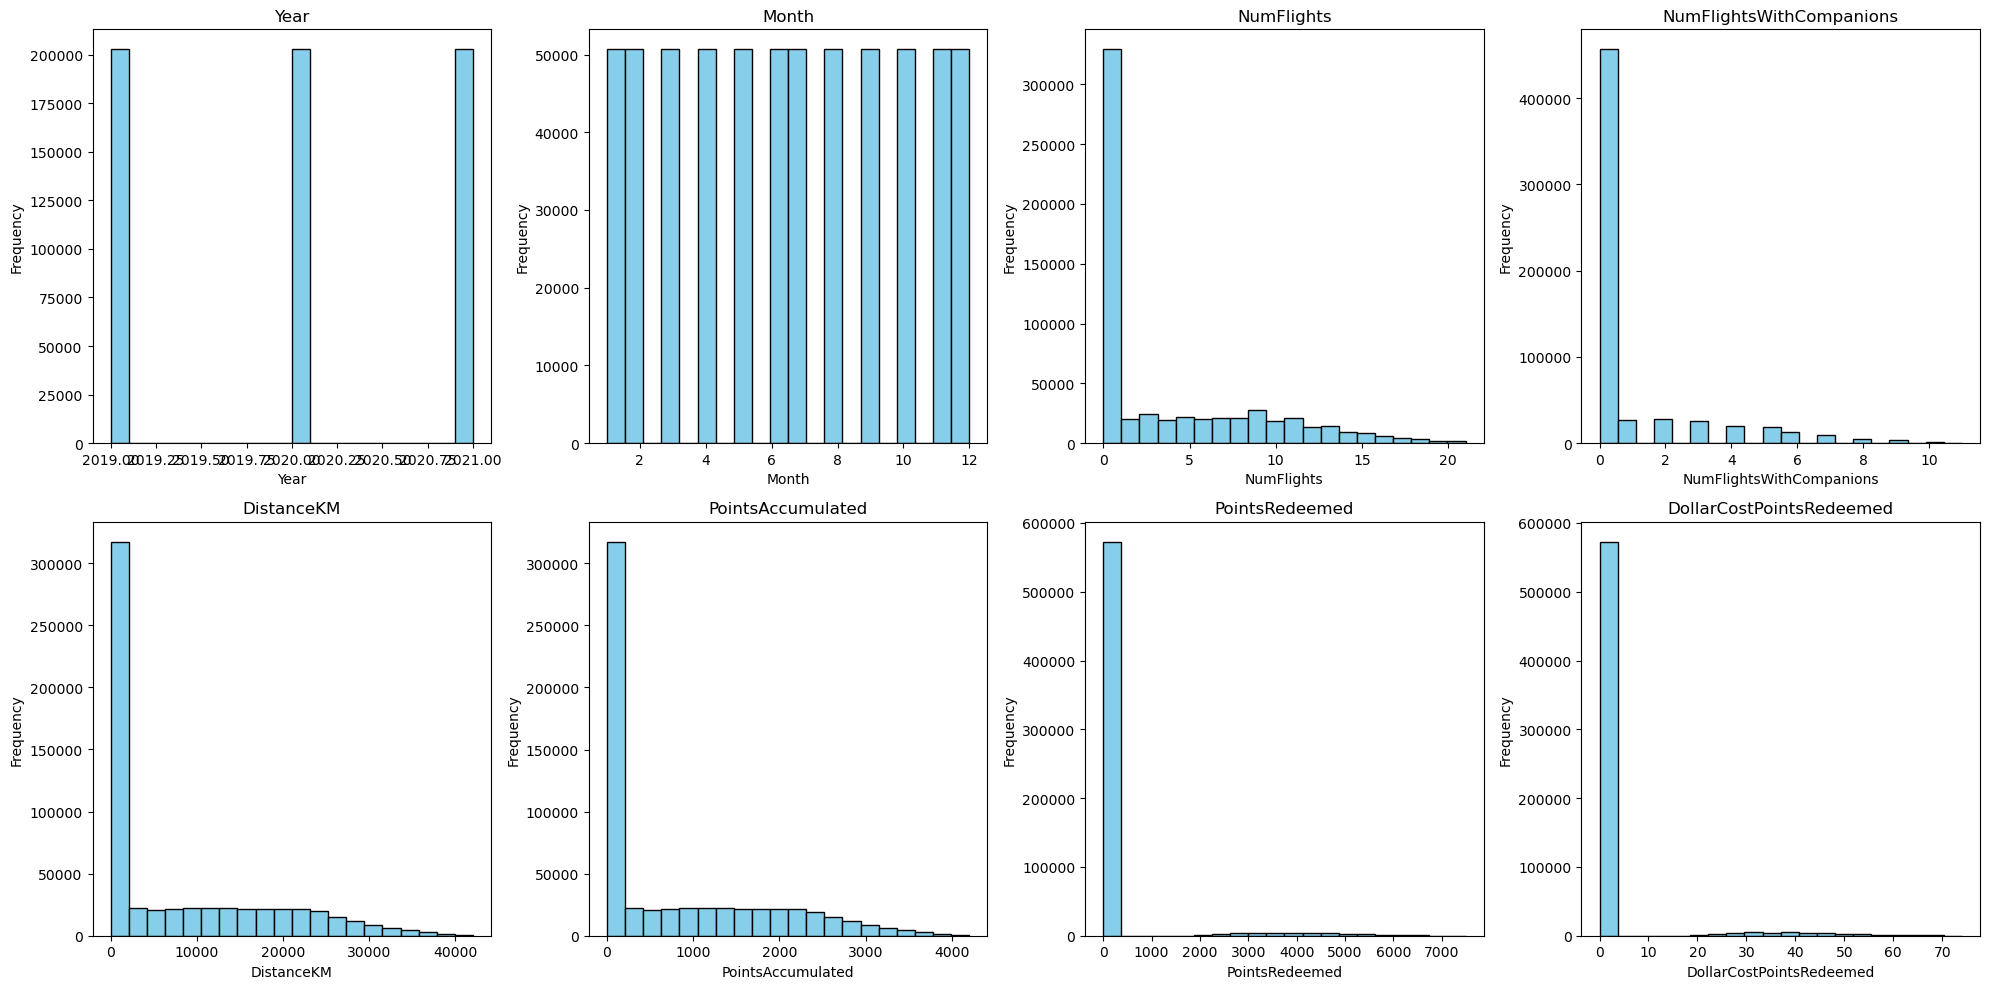

In [676]:
# Determine number of numeric columns
num_cols = len(numerical_columns_Flights)

rows = 2
cols = 4
total_plots = rows * cols

# Limit numeric_cols to at most 8 variables (2x4 grid)
plot_cols = numerical_columns_Flights[:total_plots]

plt.figure(figsize=(20, 10)) 

for i, col in enumerate(plot_cols):
    plt.subplot(rows, cols, i+1)
    plt.hist(FlightsDB[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  

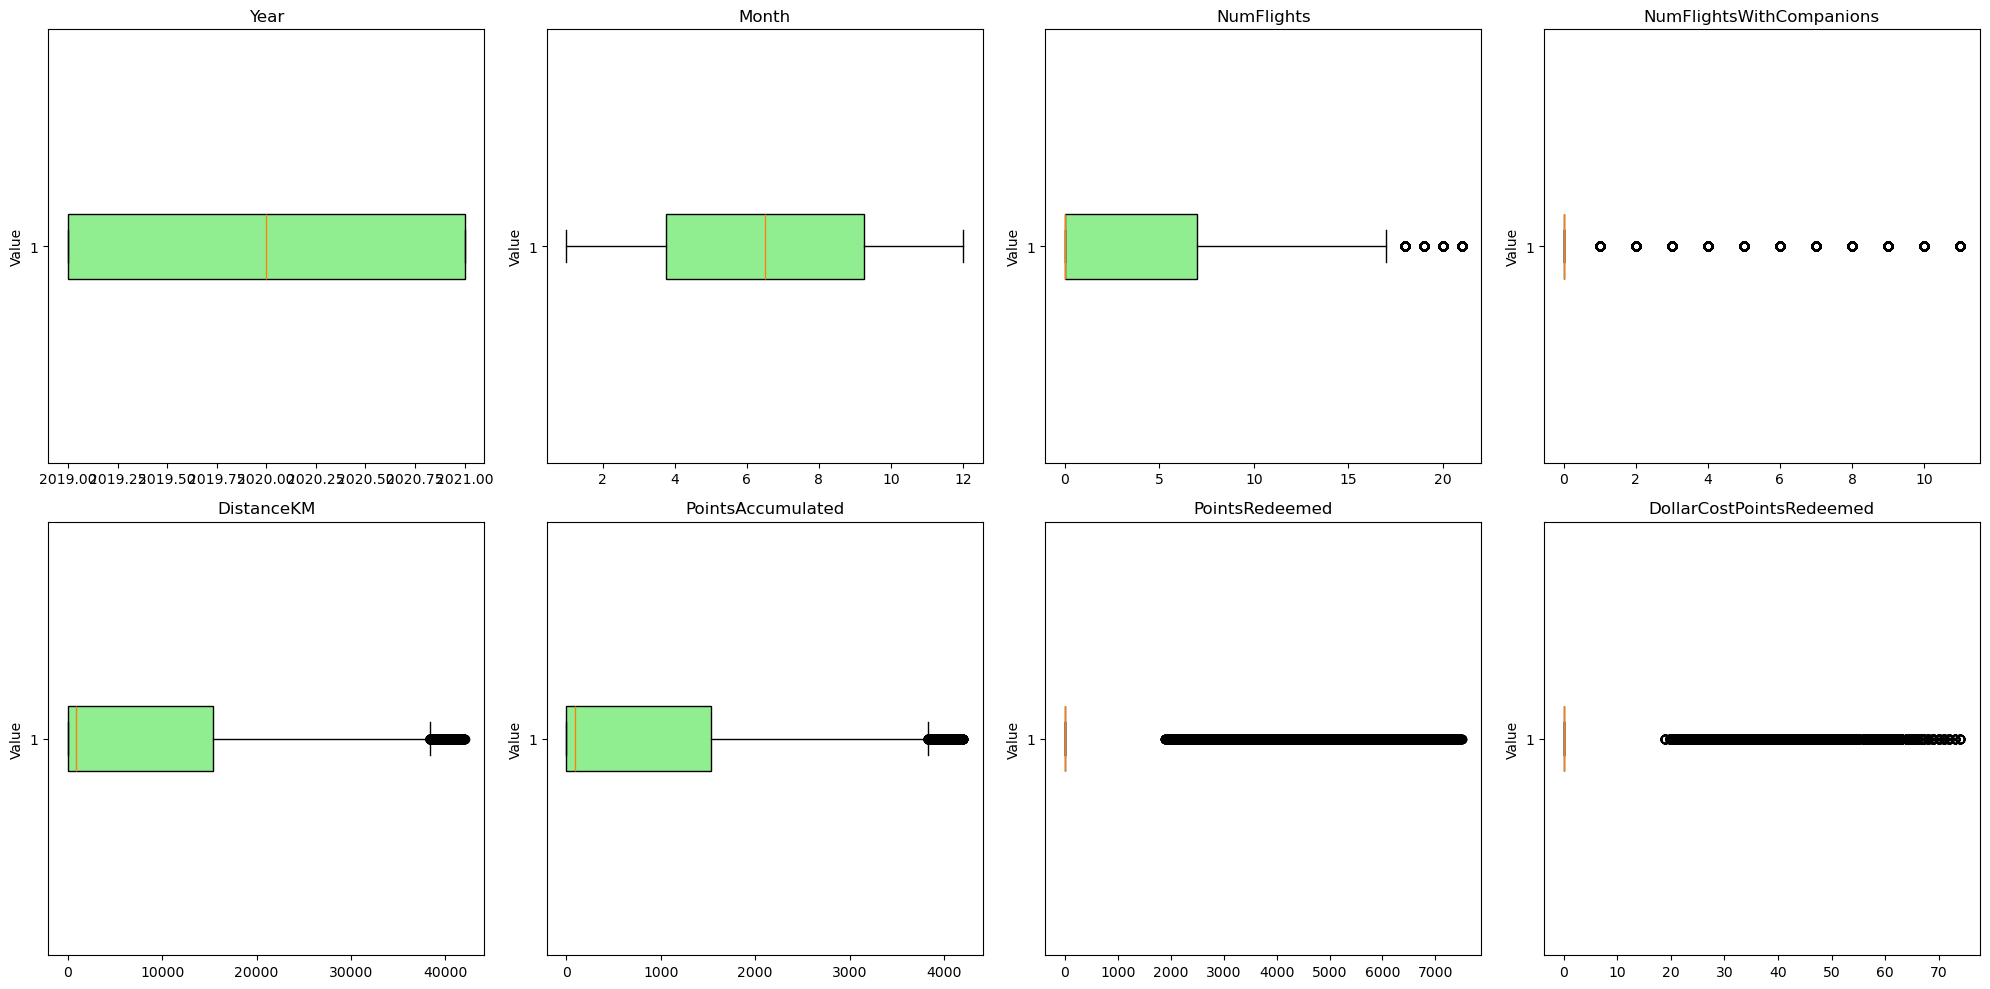

In [677]:
# Set up a grid layout: 2 rows x 4 columns
rows = 2
cols = 4
total_plots = rows * cols

# Limit numeric_cols to at most 8 variables (2x4 grid)
plot_cols = numerical_columns_Flights[:total_plots]

plt.figure(figsize=(20, 10))  # Adjust figure size as needed

# Loop through the selected numeric columns
for i, col in enumerate(plot_cols):
    plt.subplot(rows, cols, i+1)
    plt.boxplot(FlightsDB[col], vert=False, patch_artist=True, 
                boxprops=dict(facecolor='lightgreen'))    
    plt.title(col)
    plt.ylabel('Value')

plt.tight_layout()  # Adjust spacing
plt.show()

## NumFlights, NumFlightsWithCompanions, DistanceKM

In [678]:
outliers = ['NumFlights', 'NumFlightsWithCompanions', 'DistanceKM']

outlier_bounds = {}
outliers_data = {}

for col in outliers:
    Q1 = FlightsDB[col].quantile(0.25)
    Q3 = FlightsDB[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_bounds[col] = (lower_bound, upper_bound)
    
    # Get outliers for this column
    outliers_data[col] = FlightsDB[(FlightsDB[col] < lower_bound) | (FlightsDB[col] > upper_bound)].sort_values(by=col, ascending=False)

# Print results
for col in outliers:
    lb, ub = outlier_bounds[col]
    print(f"{col} - Lower bound: {lb}, Upper bound: {ub}")
    print(f"Number of outliers in {col}: {len(outliers_data[col])}\n")


NumFlights - Lower bound: -10.5, Upper bound: 17.5
Number of outliers in NumFlights: 6919

NumFlightsWithCompanions - Lower bound: 0.0, Upper bound: 0.0
Number of outliers in NumFlightsWithCompanions: 151670

DistanceKM - Lower bound: -23007.262499999997, Upper bound: 38345.4375
Number of outliers in DistanceKM: 1972



In [679]:
for col, df_outliers in outliers_data.items():
    print(f"Outliers for column: {col}")
    
    #See the first and last 2 rows for each outlier column
    values = pd.concat([df_outliers[col].head(2), df_outliers[col].tail(2)])
    
    print(values)
    print("\n" + "-"*50 + "\n")


Outliers for column: NumFlights
227374    21
380969    21
522517    18
522607    18
Name: NumFlights, dtype: int64

--------------------------------------------------

Outliers for column: NumFlightsWithCompanions
370778    11
207820    11
179        1
179587     1
Name: NumFlightsWithCompanions, dtype: int64

--------------------------------------------------

Outliers for column: DistanceKM
390460    42040.0
227550    42013.0
214101    38351.0
389855    38346.0
Name: DistanceKM, dtype: float64

--------------------------------------------------



For both numflights and numflightswithcompanions, we could log to minimize the distribution. it does not make sense removing the values, since it gives us information about the number of flights each customer had in each month.

## PointsAccumulated, PointsRedeemed and DollarCostPointsRedeemed

In [680]:
outliers = ['PointsAccumulated', 'PointsRedeemed', 'DollarCostPointsRedeemed']

outlier_bounds = {}
outliers_data = {}

for col in outliers:
    Q1 = FlightsDB[col].quantile(0.25)
    Q3 = FlightsDB[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_bounds[col] = (lower_bound, upper_bound)
    
    # Get outliers for this column
    outliers_data[col] = FlightsDB[(FlightsDB[col] < lower_bound) | (FlightsDB[col] > upper_bound)].sort_values(by=col, ascending=False)

# Print results
for col in outliers:
    lb, ub = outlier_bounds[col]
    print(f"{col} - Lower bound: {lb}, Upper bound: {ub}")
    print(f"Number of outliers in {col}: {len(outliers_data[col])}\n")


PointsAccumulated - Lower bound: -2299.5, Upper bound: 3832.5
Number of outliers in PointsAccumulated: 1991

PointsRedeemed - Lower bound: 0.0, Upper bound: 0.0
Number of outliers in PointsRedeemed: 35393

DollarCostPointsRedeemed - Lower bound: 0.0, Upper bound: 0.0
Number of outliers in DollarCostPointsRedeemed: 35393



In [681]:
for col, df_outliers in outliers_data.items():
    print(f"Outliers for column: {col}")
    
    #See the first and last 2 rows for each outlier column
    values = pd.concat([df_outliers[col].head(2), df_outliers[col].tail(2)])
    
    print(values)
    print("\n" + "-"*50 + "\n")


Outliers for column: PointsAccumulated
390460    4204
227550    4201
222244    3833
360795    3833
Name: PointsAccumulated, dtype: int64

--------------------------------------------------

Outliers for column: PointsRedeemed
213042    7496
371432    7496
431868    1894
422605    1890
Name: PointsRedeemed, dtype: int64

--------------------------------------------------

Outliers for column: DollarCostPointsRedeemed
369122    74.0
369358    74.0
425032    18.9
438781    18.9
Name: DollarCostPointsRedeemed, dtype: float64

--------------------------------------------------



## Dates Features
#### YearMonthDate

In [682]:
# Extract month, day, year as integers
FlightsDB['month'] = FlightsDB['YearMonthDate'].dt.month
FlightsDB['day'] = FlightsDB['YearMonthDate'].dt.day
FlightsDB['year'] = FlightsDB['YearMonthDate'].dt.year

# Check months are 1-12
invalid_months = FlightsDB[(FlightsDB['month'] < 1) | (FlightsDB['month'] > 12)]

# Check days are 1-31
invalid_days = FlightsDB[(FlightsDB['day'] < 1) | (FlightsDB['day'] > 31)]

# Check years are within expected range
invalid_years = FlightsDB[~FlightsDB['year'].isin([2019, 2020, 2021])]

# Print only relevant columns
print("Invalid months:\n", invalid_months[['YearMonthDate','month']])
print("Invalid days:\n", invalid_days[['YearMonthDate','day']])
print("Invalid years (should only be 2019, 2020, 2021):\n", invalid_years[['YearMonthDate','year']])

# Summary of results
if invalid_months.empty and invalid_days.empty and invalid_years.empty:
    print("All dates appear valid.")
else:
    print(f"Invalid date components detected: {len(invalid_months) + len(invalid_days) + len(invalid_years)} issues")



Invalid months:
 Empty DataFrame
Columns: [YearMonthDate, month]
Index: []
Invalid days:
 Empty DataFrame
Columns: [YearMonthDate, day]
Index: []
Invalid years (should only be 2019, 2020, 2021):
 Empty DataFrame
Columns: [YearMonthDate, year]
Index: []
All dates appear valid.


In [683]:
FlightsDB = FlightsDB.drop(columns=['month', 'year', 'day'])

## Consistency between features
### CustomerDB

#### EnrollmentDateOpening and CancellationDate

In [684]:
# Rows where CancellationDate is before EnrollmentDateOpening
invalid_dates = CustomerDB[
    (CustomerDB['CancellationDate'].notna()) & 
    (CustomerDB['CancellationDate'] < CustomerDB['EnrollmentDateOpening'])
]

print("Rows with CancellationDate before EnrollmentDate:")
display(invalid_dates)

# Rows where CancellationDate exists but LoyaltyStatus is still active
invalid_status = CustomerDB[
    (CustomerDB['CancellationDate'].notna()) & 
    (CustomerDB['LoyaltyStatus'].notna())
]

print("Rows with CancellationDate but still active LoyaltyStatus:")
display(invalid_status)


Rows with CancellationDate before EnrollmentDate:


,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
72,357549,Elisha,Furna,Elisha Furna,Canada,British Columbia,Whistler,50.116322,-122.957360,V6T 1Y8,Female,Bachelor,Rural,60817.0,Single,Star,2021-09-21,2019-05-21,3964.73,Standard
77,265297,Ebonie,Radde,Ebonie Radde,Canada,Manitoba,Winnipeg,49.895138,-97.138374,R2C 0M5,Female,Bachelor,Urban,39101.0,Married,Star,2021-07-17,2019-03-17,3978.67,Standard
176,845613,Jerald,Shiring,Jerald Shiring,Canada,Quebec,Montreal,45.501690,-73.567253,H2Y 4R4,Male,Bachelor,Urban,30598.0,Married,Star,2021-10-13,2019-06-13,4198.03,Standard
210,830547,Dortha,Detar,Dortha Detar,Canada,British Columbia,Vancouver,49.282730,-123.120740,V5R 1W3,Male,Bachelor,Rural,26245.0,Single,Star,2021-05-11,2019-01-11,4271.20,Standard
304,514900,Edith,Forslin,Edith Forslin,Canada,Ontario,Toronto,43.653225,-79.383186,P1L 8X8,Female,Bachelor,Urban,80892.0,Married,Star,2021-07-20,2019-03-20,4425.91,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16514,584796,Julieann,Mclaughlan,Julieann Mclaughlan,Canada,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,Male,Bachelor,Rural,59853.0,Single,Star,2021-08-18,2019-04-18,19454.41,Standard
16522,774931,Cira,Defide,Cira Defide,Canada,British Columbia,Whistler,50.116322,-122.957360,V6T 1Y8,Female,Bachelor,Rural,33588.0,Married,Star,2021-07-21,2019-03-21,19731.34,Standard
16551,275807,Arturo,Michaeli,Arturo Michaeli,Canada,Manitoba,Winnipeg,49.895138,-97.138374,R2C 0M5,Female,Bachelor,Urban,71467.0,Divorced,Star,2021-10-18,2019-06-18,20446.60,Standard
16634,433307,Lyndon,Vogelgesang,Lyndon Vogelgesang,Canada,Manitoba,Winnipeg,49.895138,-97.138374,R2C 0M5,Male,Bachelor,Suburban,80540.0,Married,Star,2021-08-03,2019-04-03,22758.91,Standard


Rows with CancellationDate but still active LoyaltyStatus:


,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,Male,College,Urban,0.0,Single,Star,2017-07-14,2021-01-08,3839.75,Standard
19,354730,Herbert,Cantabrana,Herbert Cantabrana,Canada,New Brunswick,Fredericton,45.963589,-66.643112,E3B 2H2,Female,College,Urban,0.0,Married,Star,2017-10-23,2021-01-02,3885.46,Standard
31,201574,Trudy,Roscoe,Trudy Roscoe,Canada,Ontario,Ottawa,45.421532,-75.697189,K1F 2R2,Female,Bachelor,Suburban,26605.0,Married,Star,2018-04-06,2018-12-06,3893.31,Standard
39,834891,Wendell,Besley,Wendell Besley,Canada,British Columbia,Vancouver,49.282730,-123.120740,V5R 1W3,Female,Bachelor,Rural,30821.0,Married,Star,2020-03-08,2020-04-18,3911.12,Standard
45,733338,Raphael,Muskrat,Raphael Muskrat,Canada,Ontario,Thunder Bay,48.380894,-89.247681,K8T 5M5,Female,Bachelor,Rural,66676.0,Married,Star,2019-06-03,2020-02-03,3919.37,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916,100012,Ethan,Thompson,Ethan Thompson,Canada,Quebec,Quebec City,46.759733,-71.141009,Y0C 7D6,Male,Bachelor,Suburban,NaN,Single,Star,2019-02-27,2019-02-27,NaN,Standard
16917,100013,Layla,Young,Layla Young,Canada,Alberta,Edmonton,53.524829,-113.546357,L3S 9Y3,Female,Bachelor,Rural,NaN,Married,Star,2017-09-20,2017-09-20,NaN,Standard
16918,100014,Amelia,Bennett,Amelia Bennett,Canada,New Brunswick,Moncton,46.051866,-64.825428,G2S 2B6,Male,Bachelor,Rural,NaN,Married,Star,2020-11-28,2020-11-28,NaN,Standard
16919,100015,Benjamin,Wilson,Benjamin Wilson,Canada,Quebec,Quebec City,46.862970,-71.133444,B1Z 8T3,Female,College,Urban,NaN,Married,Star,2020-04-09,2020-04-09,NaN,Standard


## Customer Lifetime Value and Cancellation Date

In [685]:
# Filter only customers who have a cancellation date (i.e., actually canceled)
canceled_df = CustomerDB[CustomerDB['CancellationDate'].notna()].copy()

# Create a boolean column to check if the cancellation happened before enrollment
canceled_df['CancelBeforeEnrollment'] = canceled_df['CancellationDate'] < canceled_df['EnrollmentDateOpening']

# Calculate the mean CLV for each group (True = canceled before enrollment, False = after)
mean_clv = canceled_df.groupby('CancelBeforeEnrollment')['Customer Lifetime Value'].mean()

# Display results
print("Average Customer Lifetime Value by cancellation timing:")
print(mean_clv)


Average Customer Lifetime Value by cancellation timing:
CancelBeforeEnrollment
False    8142.431606
True     8323.915000
Name: Customer Lifetime Value, dtype: float64


## Customer Name

In [686]:
# Create a full name from first and last name
CustomerDB['FullName'] = CustomerDB['First Name'].str.strip() + ' ' + CustomerDB['Last Name'].str.strip()

# Compare with Customer Name
name_inconsistencies = CustomerDB[CustomerDB['FullName'] != CustomerDB['Customer Name'].str.strip()]

# Display inconsistent rows
name_inconsistencies[['Loyalty#','First Name','Last Name','Customer Name','FullName']]

if name_inconsistencies.empty:
    print("All names are correct")
else:
    print("Please review this columns")


All names are correct


In [687]:
# Create full name
CustomerDB['FullName'] = CustomerDB['First Name'].str.strip() + ' ' + CustomerDB['Last Name'].str.strip()

# Find duplicated names
duplicates_names = CustomerDB[CustomerDB.duplicated(subset='FullName', keep=False)]

# Sort for easier inspection
duplicates_names = duplicates_names.sort_values(by='FullName')

duplicates_names[['Loyalty#','First Name','Last Name','Customer Name','EnrollmentDateOpening']]


,Loyalty#,First Name,Last Name,Customer Name,EnrollmentDateOpening


### FlightsDB

### Points Accumulated and Points Redeemed

In [688]:
# Group by Loyalty# and sum the relevant numeric columns
loyalty_summary = FlightsDB.groupby('Loyalty#').agg({
    'PointsAccumulated': 'sum',
    'PointsRedeemed': 'sum',
    'NumFlights': 'sum',
    'NumFlightsWithCompanions': 'sum',
    'DistanceKM': 'sum'
}).reset_index()

# Check points consistency: PointsAccumulated >= PointsRedeemed
loyalty_summary['points_consistent'] = loyalty_summary['PointsAccumulated'] >= loyalty_summary['PointsRedeemed']

# Check flights consistency: NumFlights >= NumFlightsWithCompanions
loyalty_summary['flights_consistent'] = loyalty_summary['NumFlights'] >= loyalty_summary['NumFlightsWithCompanions']

# Identify rows where consistency fails
points_issues = loyalty_summary[loyalty_summary['points_consistent'] == False]
flights_issues = loyalty_summary[loyalty_summary['flights_consistent'] == False]

print("Loyalty# with Points Issues (Accumulated < Redeemed):")
print(points_issues)

print("\nLoyalty# with Flights Issues (NumFlights < NumFlightsWithCompanions):")
print(flights_issues)




Loyalty# with Points Issues (Accumulated < Redeemed):
       Loyalty#  PointsAccumulated  PointsRedeemed  NumFlights  \
81       103975               5457            9014          50   
120      106444              12108           12947          47   
170      108857               8036           10549          44   
174      109023              21902           25590         165   
299      116238               6771            6798          48   
...         ...                ...             ...         ...   
16539    989067               7535            8061          23   
16551    989527               7431           10999          39   
16590    991627               4660            8599          16   
16615    992986              26000           28848         182   
16731    999891               4201            6167           1   

       NumFlightsWithCompanions  DistanceKM  points_consistent  \
81                           11     54588.0              False   
120                  

In [689]:
points_issues_head = loyalty_summary[loyalty_summary['PointsAccumulated'] < loyalty_summary['PointsRedeemed']].head()

points_issues_head.head()

,Loyalty#,PointsAccumulated,PointsRedeemed,NumFlights,NumFlightsWithCompanions,DistanceKM,points_consistent,flights_consistent
81,103975,5457,9014,50,11,54588.0,False,True
120,106444,12108,12947,47,10,121106.0,False,True
170,108857,8036,10549,44,10,80398.9,False,True
174,109023,21902,25590,165,41,219114.3,False,True
299,116238,6771,6798,48,14,67729.0,False,True


### DistanceKM and PointsAccumulated

In [690]:
# Filter rows where DistanceKM > 0 but PointsAccumulated is 0 or missing
distance_no_points = FlightsDB[
    (FlightsDB['DistanceKM'] > 0) & 
    ((FlightsDB['PointsAccumulated'] == 0) | (FlightsDB['PointsAccumulated'].isna()))
]

# Show first few problematic rows
print("Sample rows where DistanceKM > 0 but PointsAccumulated is missing or zero:")
print(distance_no_points.head())

# Count total number of such rows
num_distance_no_points = distance_no_points.shape[0]
print(f"\nTotal rows with DistanceKM > 0 but PointsAccumulated = 0 or NaN: {num_distance_no_points}")


Sample rows where DistanceKM > 0 but PointsAccumulated is missing or zero:
Empty DataFrame
Columns: [Loyalty#, Year, Month, YearMonthDate, NumFlights, NumFlightsWithCompanions, DistanceKM, PointsAccumulated, PointsRedeemed, DollarCostPointsRedeemed]
Index: []

Total rows with DistanceKM > 0 but PointsAccumulated = 0 or NaN: 0


In [691]:
# Filter rows where PointsAccumulated > 0 but DistanceKM is 0 or missing
points_no_distance = FlightsDB[
    (FlightsDB['PointsAccumulated'] > 0) &
    ((FlightsDB['DistanceKM'] == 0) | (FlightsDB['DistanceKM'].isna()))
]

# Show first few problematic rows
print("Sample rows where PointsAccumulated > 0 but DistanceKM = 0 or NaN:")
print(points_no_distance.head())

# Count total number of such rows
num_points_no_distance = points_no_distance.shape[0]
print(f"\nTotal rows with PointsAccumulated > 0 but DistanceKM = 0 or NaN: {num_points_no_distance}")


Sample rows where PointsAccumulated > 0 but DistanceKM = 0 or NaN:
Empty DataFrame
Columns: [Loyalty#, Year, Month, YearMonthDate, NumFlights, NumFlightsWithCompanions, DistanceKM, PointsAccumulated, PointsRedeemed, DollarCostPointsRedeemed]
Index: []

Total rows with PointsAccumulated > 0 but DistanceKM = 0 or NaN: 0


## Duplicated Rows 
### CustomerDB

In [692]:
# Select all fully duplicate rows (all columns must match)
fully_duplicated_rows = CustomerDB[CustomerDB.duplicated(keep=False)]

# Display the fully duplicated rows
fully_duplicated_rows

,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,...,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,FullName


In [693]:
# Select all columns except 'Loyalty#'
cols_except_loyalty = [c for c in CustomerDB.columns if c != 'Loyalty#']

# Find duplicated rows ignoring 'Loyalty#'
duplicates_ignore_loyalty = CustomerDB[CustomerDB.duplicated(subset=cols_except_loyalty, keep=False)]

# Optional: sort for easier inspection
duplicates_ignore_loyalty = duplicates_ignore_loyalty.sort_values(by=['First Name','Last Name','EnrollmentDateOpening'])

# Display
duplicates_ignore_loyalty


,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,...,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,FullName


In [694]:
CustomerDB = CustomerDB.drop(columns=[ 'FullName'])

### FlightsDB

In [695]:
# Find fully duplicated rows (identical across all columns)
duplicate_rows = FlightsDB[FlightsDB.duplicated(keep=False)]

# Print the number of fully duplicated rows
print(f"Number of fully duplicated rows: {duplicate_rows.shape[0]}")

# Display the first few duplicated rows
duplicate_rows.head()


Number of fully duplicated rows: 5778


,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
450,727091,2021,12,2021-12-01,0,0,0.0,0,0,0.0
535,369638,2021,12,2021-12-01,0,0,0.0,0,0,0.0
762,750578,2020,6,2020-06-01,0,0,0.0,0,0,0.0
941,547522,2020,6,2020-06-01,0,0,0.0,0,0,0.0
952,819842,2020,6,2020-06-01,0,0,0.0,0,0,0.0


In [696]:
# Remove fully duplicated rows (keeping only the first occurrence)
FlightsDB = FlightsDB.drop_duplicates(keep='first')

# Confirm the result
print(f"New number of rows after removing duplicates: {FlightsDB.shape[0]}")

New number of rows after removing duplicates: 605533


We should drop these duplicated rows in FlightsDB.

Check if there is more than 12 months for each customer in each year. We pretend to ensure that we are just dealing with one customer at a time.

In [697]:
# Count how many unique months exist per (Loyalty#, Year)
month_counts = (
    FlightsDB.groupby(['Loyalty#', 'Year'])['Month']
    .nunique()
    .reset_index(name='MonthCount')
)

# Show only those that don't have all 12 months
incomplete = month_counts[month_counts['MonthCount'] < 12]
problem = month_counts[month_counts['MonthCount'] >12]
print(incomplete)
print(problem)

Empty DataFrame
Columns: [Loyalty#, Year, MonthCount]
Index: []
Empty DataFrame
Columns: [Loyalty#, Year, MonthCount]
Index: []


Shows that for each Loyalty#, we just have 1 customer.

## Comparing Loyalty# in CustomerDB and FlightsDB

In [698]:
# Get unique loyalty IDs from both dataframes
loy_customer = set(CustomerDB['Loyalty#'].unique())
loy_flights = set(FlightsDB['Loyalty#'].unique())

print(f"CustomerDB has {len(loy_customer)} unique loyalty IDs.")
print(f"FlightsDB has {len(loy_flights)} unique loyalty IDs.")


CustomerDB has 16757 unique loyalty IDs.
FlightsDB has 16737 unique loyalty IDs.


In [699]:
if loy_customer == loy_flights:
    print("✅ Both datasets have exactly the same Loyalty# IDs.")
else:
    print("❌ The sets of Loyalty# are not identical.")


❌ The sets of Loyalty# are not identical.


In [700]:
# IDs that are in FlightsDB but not in CustomerDB
extra_in_flights = loy_flights - loy_customer

# IDs that are in CustomerDB but not in FlightsDB
extra_in_customers = loy_customer - loy_flights

print(f"Loyalty# only in FlightsDB: {len(extra_in_flights)}")
print(f"Loyalty# only in CustomerDB: {len(extra_in_customers)}")

# Optionally, see a few examples
print("\nExamples only in FlightsDB:", list(extra_in_flights)[:10])
print("Examples only in CustomerDB:", list(extra_in_customers)[:10])


Loyalty# only in FlightsDB: 0
Loyalty# only in CustomerDB: 20

Examples only in FlightsDB: []
Examples only in CustomerDB: [np.int64(100011), np.int64(100012), np.int64(100013), np.int64(100014), np.int64(100015), np.int64(100016), np.int64(100017), np.int64(999987), np.int64(999988), np.int64(999989)]


In [701]:
summary = pd.DataFrame({
    'Only_in_CustomerDB': [len(extra_in_customers)],
    'Only_in_FlightsDB': [len(extra_in_flights)],
    'In_Both': [len(loy_customer & loy_flights)]
})

print(summary)


   Only_in_CustomerDB  Only_in_FlightsDB  In_Both
0                  20                  0    16737


These are the 20 customers with missing values in Income and CLV 

# Preparing FlightsDB for merge

In [702]:
FlightsDB.head()

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,413052,2021,12,2021-12-01,2,2,9384.0,938,0,0.0
1,464105,2021,12,2021-12-01,0,0,0.0,0,0,0.0
2,681785,2021,12,2021-12-01,10,3,14745.0,1474,0,0.0
3,185013,2021,12,2021-12-01,16,4,26311.0,2631,3213,32.0
4,216596,2021,12,2021-12-01,9,0,19275.0,1927,0,0.0


Let's do the mean and the sum per year to have a unique Loyalty#.

In [711]:
FlightsDB= FlightsDB.copy()
id_col = 'Loyalty#'

cols = [
    'NumFlights', 
    'NumFlightsWithCompanions', 
    'DistanceKM', 
    'PointsAccumulated', 
    'PointsRedeemed', 
    'DollarCostPointsRedeemed'
]


FlightsDB_agg = FlightsDB.groupby([id_col, 'Year'])[cols].agg(['sum', 'mean']).reset_index()

FlightsDB_agg.columns = [id_col, 'Year'] + [f'{col}_{agg}' for col, agg in FlightsDB_agg.columns[2:]]

FlightsDB_wide = FlightsDB_agg.pivot(index=id_col, columns='Year')

FlightsDB_wide.columns = [f'{col}_{year}' for col, year in FlightsDB_wide.columns]

FlightsDB = FlightsDB_wide.reset_index()


KeyError: 'Year'

# FINAL DATASET

what I did is wrong.
what merges we can do:
- inner
- left
- right

In [ ]:
merged = FlightsDB.merge(CustomerDB, on='Loyalty#', how='left')

In [ ]:
merged.shape

(614452, 29)

In [ ]:
DB = merged[
    (
        # Case 1: No cancellation
        (merged['CancellationDate'].isna() & (merged['YearMonthDate'] >= merged['EnrollmentDateOpening']))
    )
    |
    (
        # Case 2: Cancellation after enrollment
        (merged['CancellationDate'].notna() & (merged['CancellationDate'] > merged['EnrollmentDateOpening']) &
         (merged['YearMonthDate'] >= merged['EnrollmentDateOpening']) &
         (merged['YearMonthDate'] < merged['CancellationDate']))
    )
    |
    (
        # Case 3: Cancellation before enrollment
        (merged['CancellationDate'] < merged['EnrollmentDateOpening']) &
        (merged['YearMonthDate'] >= merged['EnrollmentDateOpening']) &
        (merged['YearMonthDate'] < merged['CancellationDate'])
    )
]


Flight-Customer Merge Rules

**Customers without a cancellation date (CancellationDate is NaN):**

Keep all flights where YearMonthDate is greater than or equal to EnrollmentDateOpening.

**Customers with a cancellation date (CancellationDate exists) that is later than EnrollmentDateOpening:**

Keep all flights where YearMonthDate is between EnrollmentDateOpening (inclusive) and CancellationDate (exclusive).

**Cancellation before enrollment**

If the customer’s CancellationDate is earlier than the enrollment date, keep only the flights where the flight date is between the enrollment date and the cancellation date, inclusive.

In [ ]:
DB.head()

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,413052,2021,12,2021-12-01,2,2,9384.0,938,0,0.0,...,Male,Bachelor,Urban,64429.0,Married,Star,2018-05-26,NaT,15923.96,Standard
1,464105,2021,12,2021-12-01,0,0,0.0,0,0,0.0,...,Female,Bachelor,Urban,84981.0,Married,Nova,2018-05-05,NaT,3878.77,Standard
2,681785,2021,12,2021-12-01,10,3,14745.0,1474,0,0.0,...,Male,Doctor,Urban,21986.0,Divorced,Star,2017-06-23,NaT,2395.57,Standard
3,185013,2021,12,2021-12-01,16,4,26311.0,2631,3213,32.0,...,Female,Bachelor,Rural,67780.0,Divorced,Nova,2018-02-26,NaT,7284.36,Standard
4,216596,2021,12,2021-12-01,9,0,19275.0,1927,0,0.0,...,Male,Bachelor,Suburban,74034.0,Divorced,Nova,2021-02-03,NaT,2862.18,2021 Promotion


In [ ]:
DB = DB.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])

KeyError: "['Unnamed: 0_x', 'Unnamed: 0_y'] not found in axis"

In [ ]:
DB.tail()

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
614442,999631,2019,12,2019-12-01,3,1,12262.5,1226,0,0.0,...,Female,Bachelor,Urban,21104.0,Divorced,Star,2017-01-29,NaN,2572.51,Standard
614443,999731,2019,12,2019-12-01,0,0,0.0,0,0,0.0,...,Female,Bachelor,Urban,69600.0,Married,Star,2016-09-11,2020-12-30,2951.29,Standard
614446,999891,2019,12,2019-12-01,0,0,0.0,0,0,0.0,...,Female,Bachelor,Suburban,59732.0,Married,Nova,2019-05-22,2020-01-22,3745.37,Standard
614447,999902,2019,12,2019-12-01,7,0,30766.5,3076,0,0.0,...,Male,College,Urban,0.0,Married,Aurora,2017-05-24,NaN,7290.07,Standard
614448,999911,2019,12,2019-12-01,0,0,0.0,0,0,0.0,...,Male,Doctor,Suburban,23506.0,Single,Nova,2015-08-02,NaN,8564.77,Standard


In [ ]:
DB.shape

(416454, 29)

In [ ]:
DB.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loyalty#,416454.0,NaN,NaN,NaN,549177.944796,257544.782605,100018.0,327320.0,550352.0,767534.0,999986.0
Year,416454.0,NaN,NaN,NaN,2020.12325,0.808167,2019.0,2019.0,2020.0,2021.0,2021.0
Month,416454.0,NaN,NaN,NaN,6.685497,3.441914,1.0,4.0,7.0,10.0,12.0
YearMonthDate,416454,36,2021-12-01,14660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumFlights,416454.0,NaN,NaN,NaN,5.127829,5.235937,0.0,0.0,4.0,9.0,21.0
NumFlightsWithCompanions,416454.0,NaN,NaN,NaN,1.257142,2.199867,0.0,0.0,0.0,2.0,11.0
DistanceKM,416454.0,NaN,NaN,NaN,10607.939754,10663.235692,0.0,0.0,8170.0,19108.0,42040.0
PointsAccumulated,416454.0,NaN,NaN,NaN,1060.481856,1066.176394,0.0,0.0,817.0,1910.0,4204.0
PointsRedeemed,416454.0,NaN,NaN,NaN,314.234725,1129.109401,0.0,0.0,0.0,0.0,7496.0
DollarCostPointsRedeemed,416454.0,NaN,NaN,NaN,3.105517,11.168726,0.0,0.0,0.0,0.0,74.0


In [ ]:
DB.dtypes

Loyalty#                      int64
Year                          int64
Month                         int64
YearMonthDate                object
NumFlights                    int64
NumFlightsWithCompanions      int64
DistanceKM                  float64
PointsAccumulated             int64
PointsRedeemed                int64
DollarCostPointsRedeemed    float64
First Name                   object
Last Name                    object
Customer Name                object
Country                      object
Province or State            object
City                         object
Latitude                    float64
Longitude                   float64
Postal code                  object
Gender                       object
Education                    object
Location Code                object
Income                      float64
Marital Status               object
LoyaltyStatus                object
EnrollmentDateOpening        object
CancellationDate             object
Customer Lifetime Value     

In [ ]:
import pandas as pd

# --- Convert date columns ---
DB['EnrollmentDateOpening'] = pd.to_datetime(DB['EnrollmentDateOpening'], errors='coerce')
DB['CancellationDate'] = pd.to_datetime(DB['CancellationDate'], errors='coerce')
DB['YearMonthDate'] = pd.to_datetime(DB['YearMonthDate'], errors='coerce')

int_cols = ['Year', 'Month',
            'NumFlights', 'NumFlightsWithCompanions',
            'PointsAccumulated', 'PointsRedeemed']

for col in int_cols:
    DB[col] = pd.to_numeric(DB[col], errors='coerce').astype('Int64')



# --- Optional sanity check ---
print(DB.dtypes)


Loyalty#                             int64
Year                                 Int64
Month                                Int64
YearMonthDate               datetime64[ns]
NumFlights                           Int64
NumFlightsWithCompanions             Int64
DistanceKM                         float64
PointsAccumulated                    Int64
PointsRedeemed                       Int64
DollarCostPointsRedeemed           float64
First Name                          object
Last Name                           object
Customer Name                       object
Country                             object
Province or State                   object
City                                object
Latitude                           float64
Longitude                          float64
Postal code                         object
Gender                              object
Education                           object
Location Code                       object
Income                             float64
Marital Sta

In [ ]:
DB.nunique()

Loyalty#                    15819
Year                            3
Month                          12
YearMonthDate                  36
NumFlights                     22
NumFlightsWithCompanions       12
DistanceKM                  64316
PointsAccumulated            4143
PointsRedeemed               4757
DollarCostPointsRedeemed      104
First Name                   4903
Last Name                   14597
Customer Name               15966
Country                         1
Province or State              11
City                           29
Latitude                       29
Longitude                      29
Postal code                    55
Gender                          2
Education                       5
Location Code                   3
Income                       5635
Marital Status                  3
LoyaltyStatus                   3
EnrollmentDateOpening        2418
CancellationDate              829
Customer Lifetime Value      7912
EnrollmentType                  2
dtype: int64

In [ ]:
DB.nunique()==1

Loyalty#                    False
Year                        False
Month                       False
YearMonthDate               False
NumFlights                  False
NumFlightsWithCompanions    False
DistanceKM                  False
PointsAccumulated           False
PointsRedeemed              False
DollarCostPointsRedeemed    False
First Name                  False
Last Name                   False
Customer Name               False
Country                      True
Province or State           False
City                        False
Latitude                    False
Longitude                   False
Postal code                 False
Gender                      False
Education                   False
Location Code               False
Income                      False
Marital Status              False
LoyaltyStatus               False
EnrollmentDateOpening       False
CancellationDate            False
Customer Lifetime Value     False
EnrollmentType              False
dtype: bool

In [ ]:
DB = DB.drop(columns=['Country'])
#1 unique value

In [ ]:
DB.columns

Index(['Loyalty#', 'Year', 'Month', 'YearMonthDate', 'NumFlights',
       'NumFlightsWithCompanions', 'DistanceKM', 'PointsAccumulated',
       'PointsRedeemed', 'DollarCostPointsRedeemed', 'First Name', 'Last Name',
       'Customer Name', 'Province or State', 'City', 'Latitude', 'Longitude',
       'Postal code', 'Gender', 'Education', 'Location Code', 'Income',
       'Marital Status', 'LoyaltyStatus', 'EnrollmentDateOpening',
       'CancellationDate', 'Customer Lifetime Value', 'EnrollmentType'],
      dtype='object')

In [ ]:
DB.isna().sum()

Loyalty#                         0
Year                             0
Month                            0
YearMonthDate                    0
NumFlights                       0
NumFlightsWithCompanions         0
DistanceKM                       0
PointsAccumulated                0
PointsRedeemed                   0
DollarCostPointsRedeemed         0
First Name                       0
Last Name                        0
Customer Name                    0
Province or State                0
City                             0
Latitude                         0
Longitude                        0
Postal code                      0
Gender                           0
Education                        0
Location Code                    0
Income                           0
Marital Status                   0
LoyaltyStatus                    0
EnrollmentDateOpening            0
CancellationDate            397457
Customer Lifetime Value          0
EnrollmentType                   0
dtype: int64

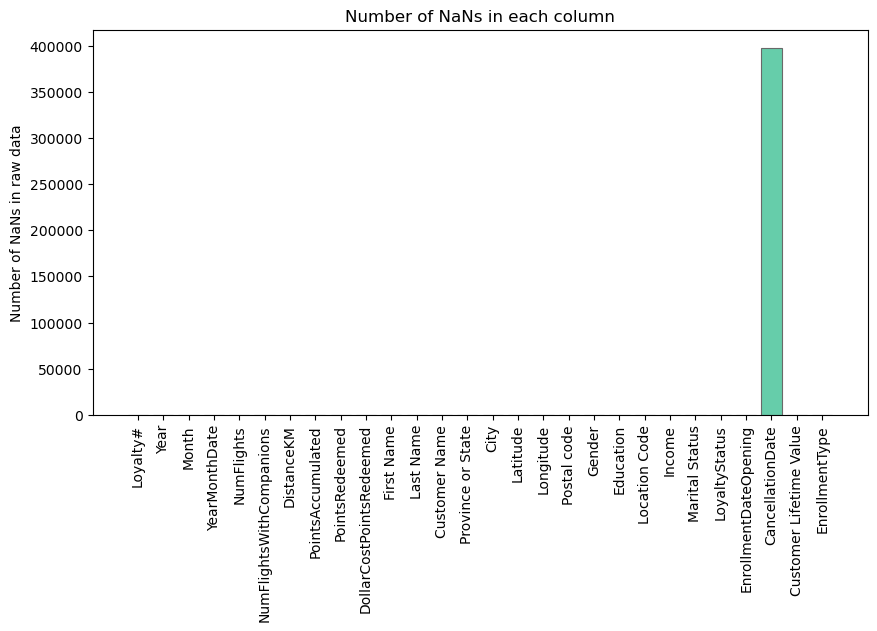

In [ ]:
number_of_nans = DB.isnull().sum()
x_xis = number_of_nans.index.tolist()
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.ylabel('Number of NaNs in raw data')
plt.title('Number of NaNs in each column')
plt.bar(x=x_xis, height=number_of_nans, color='mediumaquamarine', edgecolor='dimgray', linewidth=0.8)

plt.show()

In [ ]:
primary_key = ['Loyalty#', 'Customer Name']
unique_count = DB[primary_key].drop_duplicates().shape[0]
n_rows = DB.shape[0]

if unique_count != n_rows:
    print('Oh no! There are repetitions!')
else:
    print('All good! No repetitions!')


Oh no! There are repetitions!


In [ ]:
# Group by Loyalty# and see if there are multiple unique customer names
loyalty_name_counts = DB.groupby('Loyalty#')['Customer Name'].nunique()

# Filter Loyalty# with more than one unique customer name
duplicate_ids_different_names = loyalty_name_counts[loyalty_name_counts > 1].index

# Select rows with these Loyalty# values
duplicated_loyalty_diff_name = DB[DB['Loyalty#'].isin(duplicate_ids_different_names)]

# Sort by Loyalty# and EnrollmentDateOpening
duplicated_loyalty_sorted = duplicated_loyalty_diff_name.sort_values(by=['Loyalty#', 'EnrollmentDateOpening'])

# Show the result
duplicated_loyalty_sorted[['Loyalty#', 'Customer Name', 'EnrollmentDateOpening']]


,Loyalty#,Customer Name,EnrollmentDateOpening
2909,101902,Hans Schlottmann,2020-01-07
5744,101902,Hans Schlottmann,2020-01-07
13957,101902,Hans Schlottmann,2020-01-07
28361,101902,Hans Schlottmann,2020-01-07
37557,101902,Hans Schlottmann,2020-01-07
...,...,...,...
580173,992168,Crysta Bennin,2017-12-18
597240,992168,Crysta Bennin,2017-12-18
597242,992168,Crysta Bennin,2017-12-18
614313,992168,Crysta Bennin,2017-12-18


In [ ]:
# Select all duplicate rows
duplicates_df = DB[DB.duplicated(keep=False)]

# Optional: sort by Loyalty# or any other column
duplicates_df = duplicates_df.sort_values(by='Loyalty#')

# Display the duplicates
duplicates_df


,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType


In [ ]:
# Remove fully duplicate rows, keeping the first occurrence
DB_clean = DB.drop_duplicates(keep='first')

# Optional: reset the index
DB_clean = DB_clean.reset_index(drop=True)

# Display the cleaned DataFrame
DB_clean

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed,...,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,413052,2021,12,2021-12-01,2,2,9384.0,938,0,0.0,...,Male,Bachelor,Urban,64429.0,Married,Star,2018-05-26,NaT,15923.96,Standard
1,464105,2021,12,2021-12-01,0,0,0.0,0,0,0.0,...,Female,Bachelor,Urban,84981.0,Married,Nova,2018-05-05,NaT,3878.77,Standard
2,681785,2021,12,2021-12-01,10,3,14745.0,1474,0,0.0,...,Male,Doctor,Urban,21986.0,Divorced,Star,2017-06-23,NaT,2395.57,Standard
3,185013,2021,12,2021-12-01,16,4,26311.0,2631,3213,32.0,...,Female,Bachelor,Rural,67780.0,Divorced,Nova,2018-02-26,NaT,7284.36,Standard
4,216596,2021,12,2021-12-01,9,0,19275.0,1927,0,0.0,...,Male,Bachelor,Suburban,74034.0,Divorced,Nova,2021-02-03,NaT,2862.18,2021 Promotion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416449,999631,2019,12,2019-12-01,3,1,12262.5,1226,0,0.0,...,Female,Bachelor,Urban,21104.0,Divorced,Star,2017-01-29,NaT,2572.51,Standard
416450,999731,2019,12,2019-12-01,0,0,0.0,0,0,0.0,...,Female,Bachelor,Urban,69600.0,Married,Star,2016-09-11,2020-12-30,2951.29,Standard
416451,999891,2019,12,2019-12-01,0,0,0.0,0,0,0.0,...,Female,Bachelor,Suburban,59732.0,Married,Nova,2019-05-22,2020-01-22,3745.37,Standard
416452,999902,2019,12,2019-12-01,7,0,30766.5,3076,0,0.0,...,Male,College,Urban,0.0,Married,Aurora,2017-05-24,NaT,7290.07,Standard


In [ ]:
# Group by Loyalty# and EnrollmentDateOpening
points_summary = DB_clean.groupby(['Loyalty#','EnrollmentDateOpening']).agg(
    total_points_accumulated=('PointsAccumulated','sum'),
    total_points_redeemed=('PointsRedeemed','sum')
).reset_index()

# Check if accumulated >= redeemed
points_summary['points_ok'] = points_summary['total_points_accumulated'] >= points_summary['total_points_redeemed']

# Display the summary
points_summary


,Loyalty#,EnrollmentDateOpening,total_points_accumulated,total_points_redeemed,points_ok
0,100018,2019-08-09,40467,12236,True
1,100102,2016-03-09,33900,18759,True
2,100140,2019-07-30,33010,4896,True
3,100214,2018-08-06,36451,12907,True
4,100272,2017-01-09,42949,10891,True
...,...,...,...,...,...
15961,999902,2017-05-24,61002,10501,True
15962,999911,2015-08-02,0,0,True
15963,999940,2020-07-25,17164,5620,True
15964,999982,2021-07-06,5264,0,True


In [ ]:
# Rows where accumulated points < redeemed points
points_issues = points_summary[points_summary['points_ok'] == False]

# Display them
points_issues


,Loyalty#,EnrollmentDateOpening,total_points_accumulated,total_points_redeemed,points_ok
78,103975,2021-08-21,5457,9014,False
114,106444,2020-12-20,12108,12947,False
164,108857,2020-08-20,5624,7948,False
168,109023,2018-07-22,21902,25590,False
286,116238,2021-07-14,6771,6798,False
...,...,...,...,...,...
15775,989067,2021-06-17,7535,8061,False
15784,989527,2021-02-03,7431,10999,False
15824,991627,2021-01-12,4660,8599,False
15932,997964,2020-04-25,17121,17750,False


## Features

In [ ]:
numeric_cols = DB_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_cols = DB_clean.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

## Categorical Columns

In [ ]:
DB_clean.columns

Index(['Loyalty#', 'Year', 'Month', 'YearMonthDate', 'NumFlights',
       'NumFlightsWithCompanions', 'DistanceKM', 'PointsAccumulated',
       'PointsRedeemed', 'DollarCostPointsRedeemed', 'First Name', 'Last Name',
       'Customer Name', 'Province or State', 'City', 'Latitude', 'Longitude',
       'Postal code', 'Gender', 'Education', 'Location Code', 'Income',
       'Marital Status', 'LoyaltyStatus', 'EnrollmentDateOpening',
       'CancellationDate', 'Customer Lifetime Value', 'EnrollmentType'],
      dtype='object')

## Numerical Features

C:\Users\calco\anaconda4\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


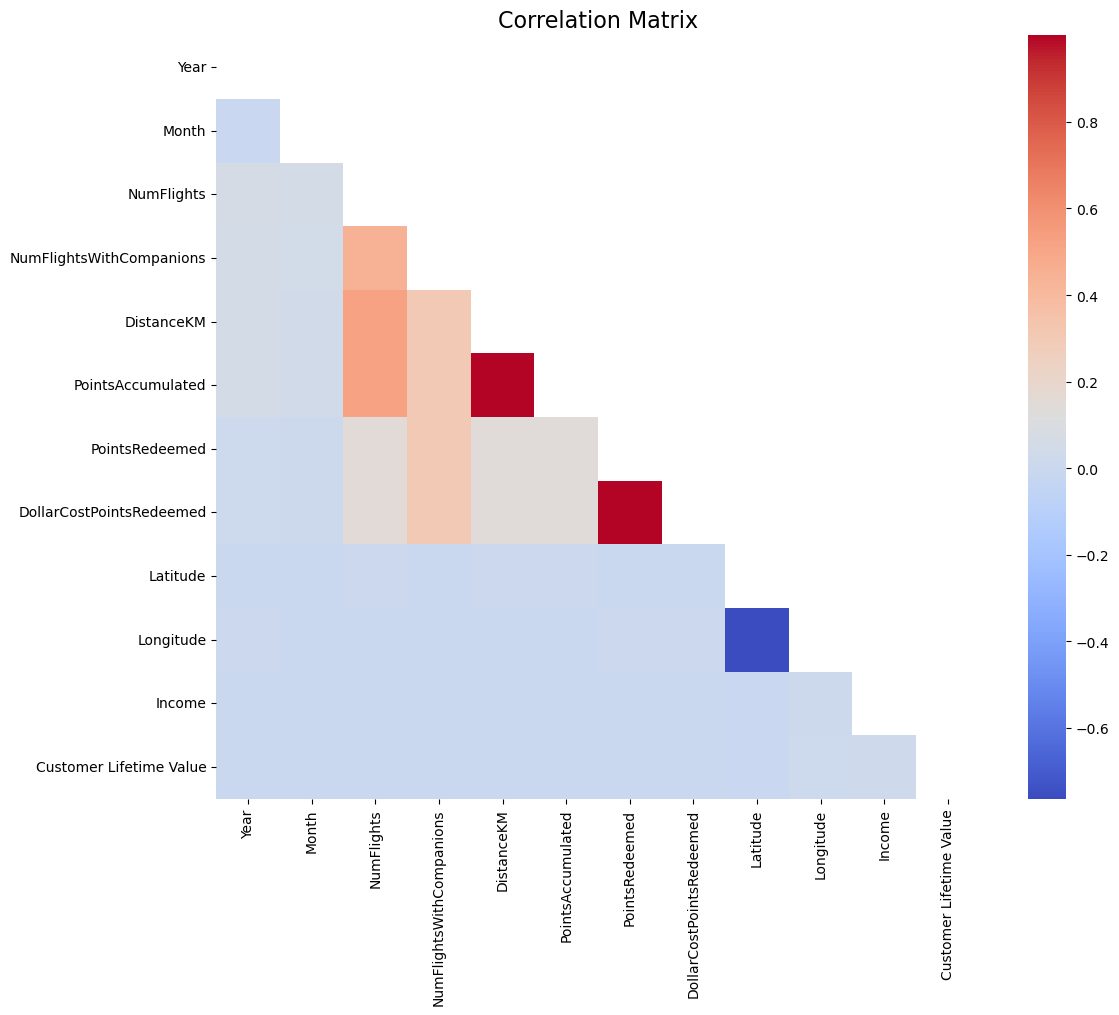

In [ ]:
# Calcula a matriz de correlação
corr_matrix = DB_clean[numeric_cols_filtered].corr()

# Criar máscara para o triângulo superior (ou inferior)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # triângulo superior
# mask = np.tril(np.ones_like(corr_matrix, dtype=bool)) # triângulo inferior, se preferires

# Configura figura
plt.figure(figsize=(12, 10))

# Plota heatmap com máscara
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
corr_matrix.head(12)

,Year,Month,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed,Latitude,Longitude,Income,Customer Lifetime Value
Year,1.000000,-0.006491,0.063672,0.053487,0.052231,0.052244,0.015099,0.015072,0.000019,0.001053,-0.000026,0.000028
Month,-0.006491,1.000000,0.055662,0.045779,0.040170,0.040176,0.012018,0.012122,0.000542,-0.000781,0.000737,0.000021
NumFlights,0.063672,0.055662,1.000000,0.445078,0.519242,0.519177,0.146192,0.146178,0.002681,-0.002139,-0.002379,-0.001442
NumFlightsWithCompanions,0.053487,0.045779,0.445078,1.000000,0.307834,0.307798,0.304559,0.304452,-0.000221,-0.001251,-0.000859,-0.002277
DistanceKM,0.052231,0.040170,0.519242,0.307834,1.000000,1.000000,0.143843,0.143804,0.002011,-0.003128,0.000533,-0.003127
PointsAccumulated,0.052244,0.040176,0.519177,0.307798,1.000000,1.000000,0.143824,0.143785,0.002010,-0.003127,0.000533,-0.003127
PointsRedeemed,0.015099,0.012018,0.146192,0.304559,0.143843,0.143824,1.000000,0.999970,-0.002957,0.002254,-0.002309,-0.000006
DollarCostPointsRedeemed,0.015072,0.012122,0.146178,0.304452,0.143804,0.143785,0.999970,1.000000,-0.002946,0.002247,-0.002306,-0.000033
Latitude,0.000019,0.000542,0.002681,-0.000221,0.002011,0.002010,-0.002957,-0.002946,1.000000,-0.763944,-0.011939,-0.010908
Longitude,0.001053,-0.000781,-0.002139,-0.001251,-0.003128,-0.003127,0.002254,0.002247,-0.763944,1.000000,0.009279,0.017469


## Distance KM vs Points Accumulated

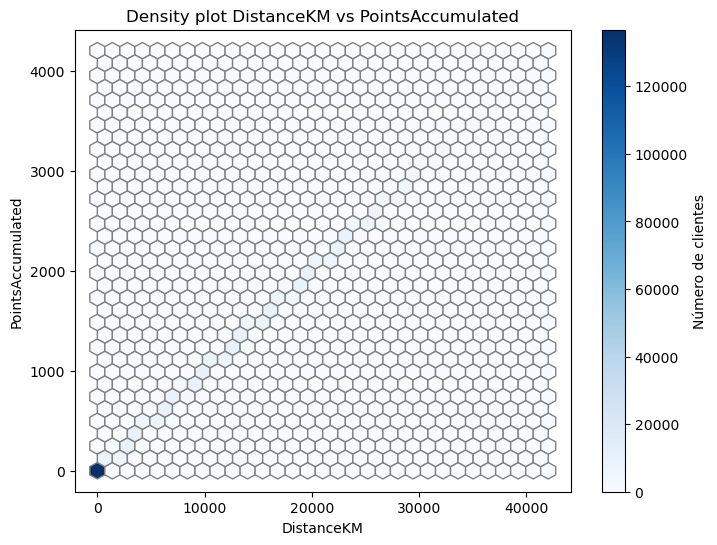

In [ ]:
plt.figure(figsize=(8,6))
plt.hexbin(
    DB_clean['DistanceKM'], 
    DB_clean['PointsAccumulated'], 
    gridsize=30, 
    cmap='Blues',
    edgecolors='grey'  # contorno para cada hexágono
)
plt.colorbar(label='Número de clientes')
plt.xlabel('DistanceKM')
plt.ylabel('PointsAccumulated')
plt.title('Density plot DistanceKM vs PointsAccumulated')
plt.show()


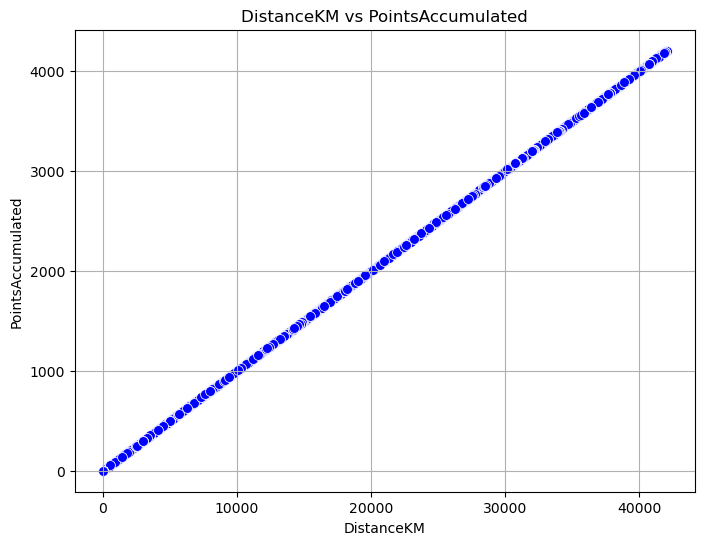

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=DB_clean['DistanceKM'], 
    y=DB_clean['PointsAccumulated'],
    color='blue',   # cor sólida
    s=50,           # tamanho do ponto
    alpha=1.0       # opacidade total
)
plt.xlabel('DistanceKM')
plt.ylabel('PointsAccumulated')
plt.title('DistanceKM vs PointsAccumulated')
plt.grid(True)
plt.show()


In [ ]:
## vamos ter que retirar uma destas variaveis, pois a sua correlação é 1

## NumFlights Vs Points Accumulated

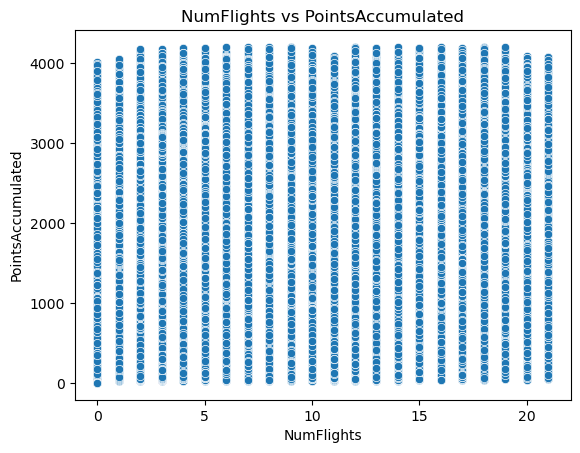

In [ ]:
# Scatter plot
sns.scatterplot(data=DB_clean, x='NumFlights', y='PointsAccumulated')
plt.title('NumFlights vs PointsAccumulated')
plt.show()

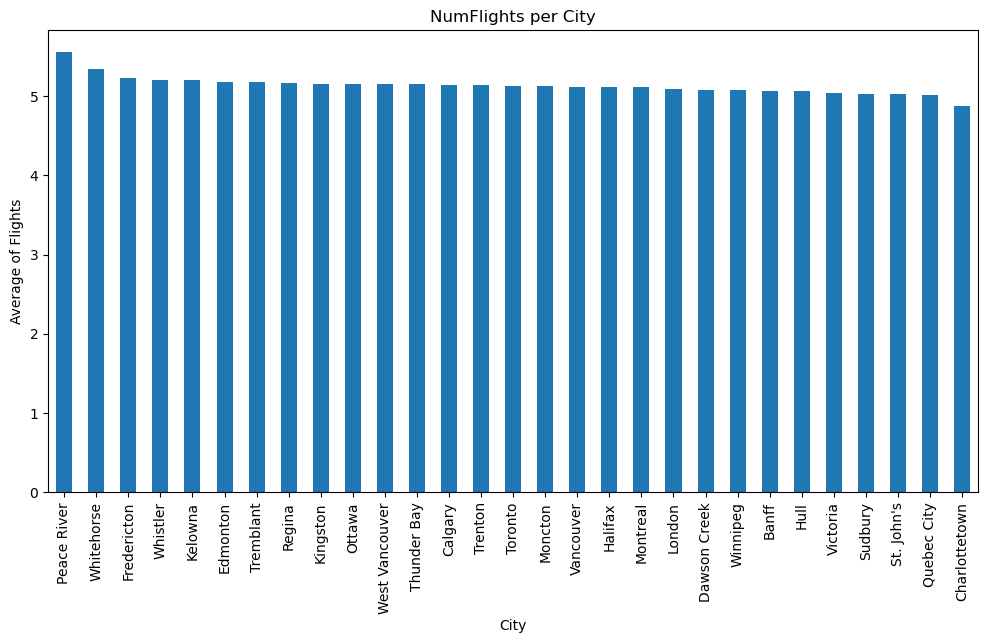

In [ ]:
city_flights = DB_clean.groupby('City')['NumFlights'].mean().sort_values(ascending=False)
city_flights.plot(kind='bar', figsize=(12,6))
plt.title('NumFlights per City')
plt.ylabel('Average of Flights')
plt.show()


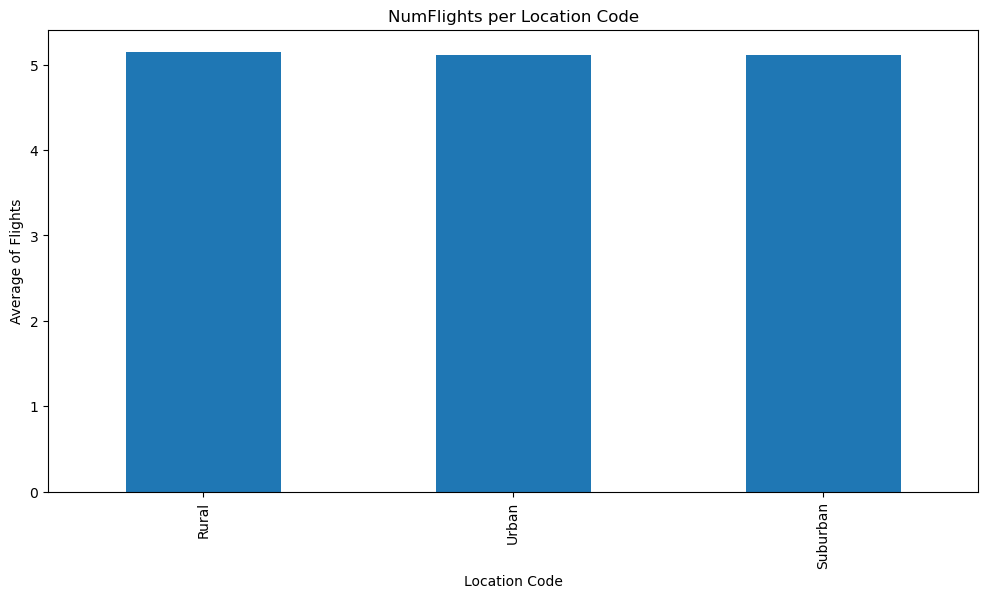

In [ ]:
location_flights = DB_clean.groupby('Location Code')['NumFlights'].mean().sort_values(ascending=False)
location_flights.plot(kind='bar', figsize=(12,6))
plt.title('NumFlights per Location Code')
plt.ylabel('Average of Flights')
plt.show()

## 3 Build New Features

In [ ]:
new_features_list = []

## Redemption Rate

In [ ]:
DB_clean['Redemption Rate'] = DB_clean['PointsRedeemed'] / DB_clean['PointsAccumulated']

DB_clean['Redemption Rate'].replace([np.inf, -np.inf], np.nan, inplace=True)

new_features_list.append('Redemption Rate')

## Renroll

In [ ]:
DB_clean['Renroll'] = np.where(DB_clean['CancellationDate'] < DB_clean['EnrollmentDateOpening'], 1, 0)
new_features_list.append('Renroll')

## Has canceled

In [ ]:
def compute_final_canceled(group):
    # Sort by EnrollmentDateOpening
    group = group.sort_values('EnrollmentDateOpening')
    
    # Check if there is any active period after a cancellation
    # Iterate over the records from first to last
    canceled = 1  # assume canceled initially
    for i, row in group.iterrows():
        if pd.isna(row['CancellationDate']):
            canceled = 0  # still active
            break
        # check if there is a subsequent period with EnrollmentDate > CancellationDate
        later_periods = group[group['EnrollmentDateOpening'] > row['CancellationDate']]
        if not later_periods.empty:
            canceled = 0
            break
    return pd.Series({'Has Canceled': canceled})



In [ ]:
new_features_list.append('Has Canceled')
new_features_list

['Redemption Rate', 'Renroll', 'Has Canceled']

## Active Days

In [ ]:
import pandas as pd
import numpy as np

today = pd.Timestamp('today')

# Make sure Renroll exists per customer
# 1 = customer re-enrolled at least once, 0 = no re-enrollment
# Example: DB['Renroll'] already calculated per customer

# Merge Renroll flag to DB if needed
# DB = DB.merge(DB_reenroll, on='Loyalty#', how='left')

# Function to compute ActiveDays considering re-enrollment
def compute_active_days(row):
    if row['Renroll'] == 1:
        # Sum days before cancellation + days after re-enrollment
        days_before_cancel = 0
        if pd.notna(row['CancellationDate']):
            days_before_cancel = (row['CancellationDate'] - row['EnrollmentDateOpening']).days
        days_after_enroll = (today - row['EnrollmentDateOpening']).days
        return max(days_before_cancel, 0) + max(days_after_enroll, 0)
    else:
        # Normal calculation
        if pd.notna(row['CancellationDate']):
            return max((row['CancellationDate'] - row['EnrollmentDateOpening']).days, 0)
        else:
            return max((today - row['EnrollmentDateOpening']).days, 0)

# Convert to years if needed
DB_clean['ActiveYears'] = DB_clean['ActiveDays'] / 365

# Add to feature list if not already
if 'ActiveDays' not in new_features_list:
    new_features_list.append('ActiveDays')

KeyError: 'ActiveDays'

## Net Points

In [ ]:
DB_clean['Net Points'] = DB_clean['PointsAccumulated']-DB_clean['PointsRedeemed']
new_features_list.append('Net Points')

Before going to preprocessing, let's drop some columns we will not need

In [ ]:
#drop columns that are not necessary